# Latar Belakang

## Problem Statement

Belanja online telah menjadi kebiasaan baru di masa kini, lebih dari 80% pengguna internet di dunia telah berbelanja produk online. Adanya perkembangan tersebut menyebabkan persaingan yang ketat diantara E-commerce. Persaingan tersebut diantaranya untuk menarik pembeli dan membuat mereka nyaman sehingga akan menjadi pelanggan.

Dari dataset yang dimiliki terdapat 16.83% Customer churn yang akan mengakibatkan kerugian. Hal ini dikarenakan biaya untuk mempertahankan customer lebih kecil 5 kali lipat dibanding biaya untuk mencari customer baru.

## Role

Sebagai tim analis dari sebuah perusahaan consultant yang bergerak dalam bidang bisnis khususnya di data science, kami akan menganalisa data E-commerce yang telah diberikan dan memberikan solusi serta saran yang paling tepat untuk mencegah terjadinya churn dari customer.

## Goal

Tujuan kami adalah menemukan insight yang dapat digunakan sebagai solusi dan saran untuk mengurangi serta mencegah terjadinya churn dari customer.

## Objective

sasaran akhir dari project ini adalah menganalisa data untuk menemukan insight serta membuat model machine learning yang dapat memprediksi apakah customer akan churn, sehingga dapat dijadikan panduan untuk mengambil solusi dan kesimpulan dalam mengurangi churn customer.

## Business Metrics

- Customer Churn Rate
- Potential Profit

## Reference

[persentase online shopping dunia](https://www.statista.com/statistics/1192578/worldwide-share-of-consumers-that-shop-online/#:~:text=In%202020%2C%20a%20total%20of,buying%20items%20on%20the%20internet)

# EDA

## Install and import dependencies

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [30]:
# pip install pandas-profiling

In [31]:
# pip install openpyxl

In [32]:
%matplotlib inline

In [33]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Test project

06/03/2022  17:12    <DIR>          .
06/03/2022  17:12    <DIR>          ..
14/02/2022  00:27                66 .gitattributes
06/03/2022  17:12    <DIR>          .ipynb_checkpoints
06/03/2022  17:12    <DIR>          catboost_info
17/02/2022  17:18            95.545 df_test.csv
21/02/2022  18:41           279.065 df_test_2.csv
17/02/2022  17:18           365.331 df_train.csv
21/02/2022  18:41         1.079.863 df_train_2.csv
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
06/03/2022  17:11           940.929 Full notebook - Copy.ipynb
06/03/2022  17:02         3.979.665 Full notebook.ipynb
06/03/2022  17:12    <DIR>          Guidance
05/03/2022  14:21           208.179 Insight.ipynb
05/03/2022  17:54         7.855.042 Intellegend Final Project Presentation.pdf
05/03/2022  17:58        12.075.596 Intellegend Final Project Presentation.pptx
1

In [34]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [35]:
df.duplicated().sum()

0

In [36]:
df.head(3)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [38]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [39]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [40]:
df[num].describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [41]:
df[cat].describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

In [42]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [43]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [44]:
df[df['OrderAmountHikeFromlastYear'].isna()]

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
10         50011      1     4.0         Mobile Phone         1   
40         50041      0    23.0         Mobile Phone         1   
65         50066      0    25.0         Mobile Phone         1   
106        50107      0    15.0         Mobile Phone         1   
108        50109      0    23.0         Mobile Phone         3   
...          ...    ...     ...                  ...       ...   
5534       55535      0    61.0         Mobile Phone         3   
5537       55538      0    23.0             Computer         1   
5561       55562      0    29.0         Mobile Phone         2   
5597       55598      0    13.0             Computer         1   
5603       55604      0    16.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
10               18.0     Cash on Delivery  Female             2.0   
40               17.0           Debit Card  Female             2.0   
65                6.0           Debit Card    Male             3.0   
106              10.0     Cash on Delivery    Male             2.0   
108               6.0          Credit Card  Female             3.0   
...               ...                  ...     ...             ...   
5534             28.0           Debit Card  Female             4.0   
5537              9.0           Debit Card    Male             3.0   
5561             33.0                  UPI    Male             4.0   
5597             16.0           Debit Card    Male             3.0   
5603              9.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
10                           3           Others                  3   
40                           3           Others                  4   
65                           4           Others                  3   
106                          3           Others                  2   
108                          3           Others                  2   
...                        ...              ...                ...   
5534                         4          Grocery                  1   
5537                         4           Others                  1   
5561                         2           Others                  4   
5597                         4           Others                  1   
5603                         4           Others                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
10        Divorced                2         0                          NaN   
40          Single                4         0                          NaN   
65        Divorced                1         0                          NaN   
106       Divorced                2         0                          NaN   
108        Married                4         0                          NaN   
...            ...              ...       ...                          ...   
5534       Married                6         1                          NaN   
5537       Married                5         0                          NaN   
5561       Married                6         1                          NaN   
5597        Single                4         0                          NaN   
5603       Married                7         0                          NaN   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
10           9.0        15.0                8.0          295.45  
40           2.0         4.0                4.0          299.26  
65           1.0        11.0                9.0          299.99  
106          0.0        11.0               15.0          292.32  
108          1.0         1.0                6.0          295.17  
...          ...         ...                ...             ...  
5534         1.0         2.0                1.0          303.75  
5537         5.0         5.0                4.0          316.61  


1. Apakah ada kolom dengan tipe data kurang sesuai?

Ada beberapa kolom yang awalnya bertipe data integer namun berubah menjadi float karena memiliki missing value, seperti pada kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder. Namun hal ini tidak terlalu berefek banyak karena hanya menambahkan display .0 pada data. Selain itu, semua tipe data sudah sesuai.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

ada beberapa kolom dengan nilai kosong yaitu: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

3. Apakah ada kolom yang isi nilainya tidak sesuai?

Tidak ada, semua kolum sudah memiliki isi yang sesuai dengan namanya. Namun ada kolom yang memiliki 2 value yang sama namun dengan nama yang berbeda, yaitu kolom PreferredLoginDevice, Phone dan Mobile Phone memiliki arti yang sama, karena telepon yang tidak mobile (bukan smart phone) tidak bisa digunakan untuk login. Tak hanya itu, pada kolom PreferredPaymentMode juga terdapat beberapa category yang sama dengan nama berbeda, seperti CC dan Credit Card serta COD dan Cash on Delivery. Nantinya category ini akan dijadikan satu pada saat preprocessing.

4. Apakah ada kolom yang memiliki nilai summary agak aneh?

beberapa kolom memiliki mean yang cukup jauh dari median, yang berarti distribusinya tidak mendekati normal. kolom-kolom ini adalah, NumberOfAddress, CouponUsed, OrderCount, DaySinceLastOrder. Selain itu column Tenure, WarehouseToHome, NumberOfAddress, CouponUsed OrderCount dan DaySinceLastOrder juga memiliki nilai maksimal yang jauh dari median.


In [45]:
df.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [46]:
(948/df.shape[0]) * 100

16.838365896980463

In [47]:
# pr = ProfileReport(df)
# pr.to_file(output_file='output.html')

## Univariate Analysis

In [48]:
num

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

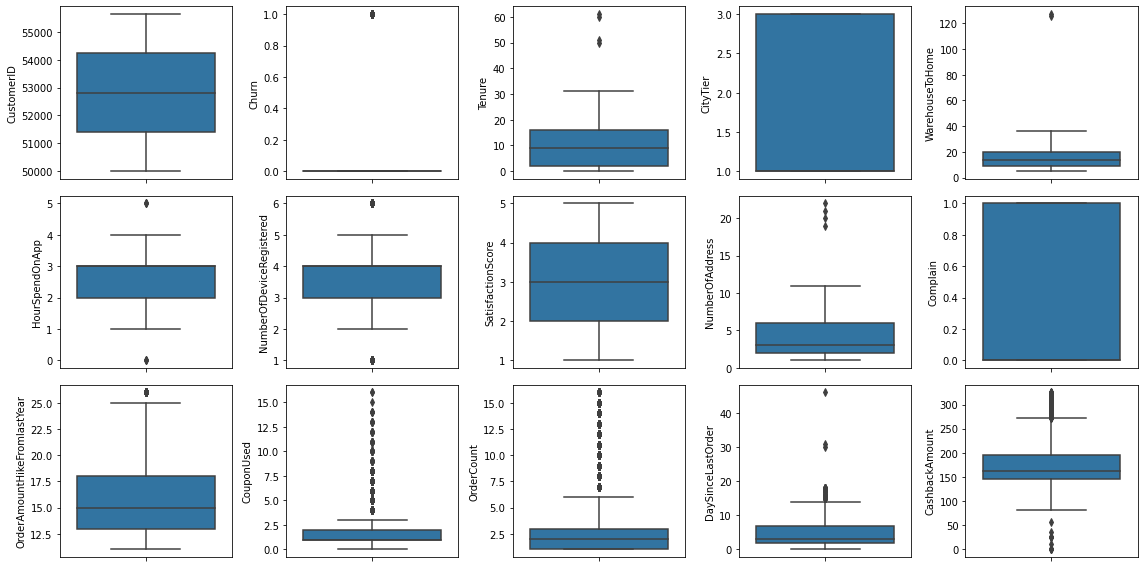

In [49]:
plt.figure(figsize = (16,8))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

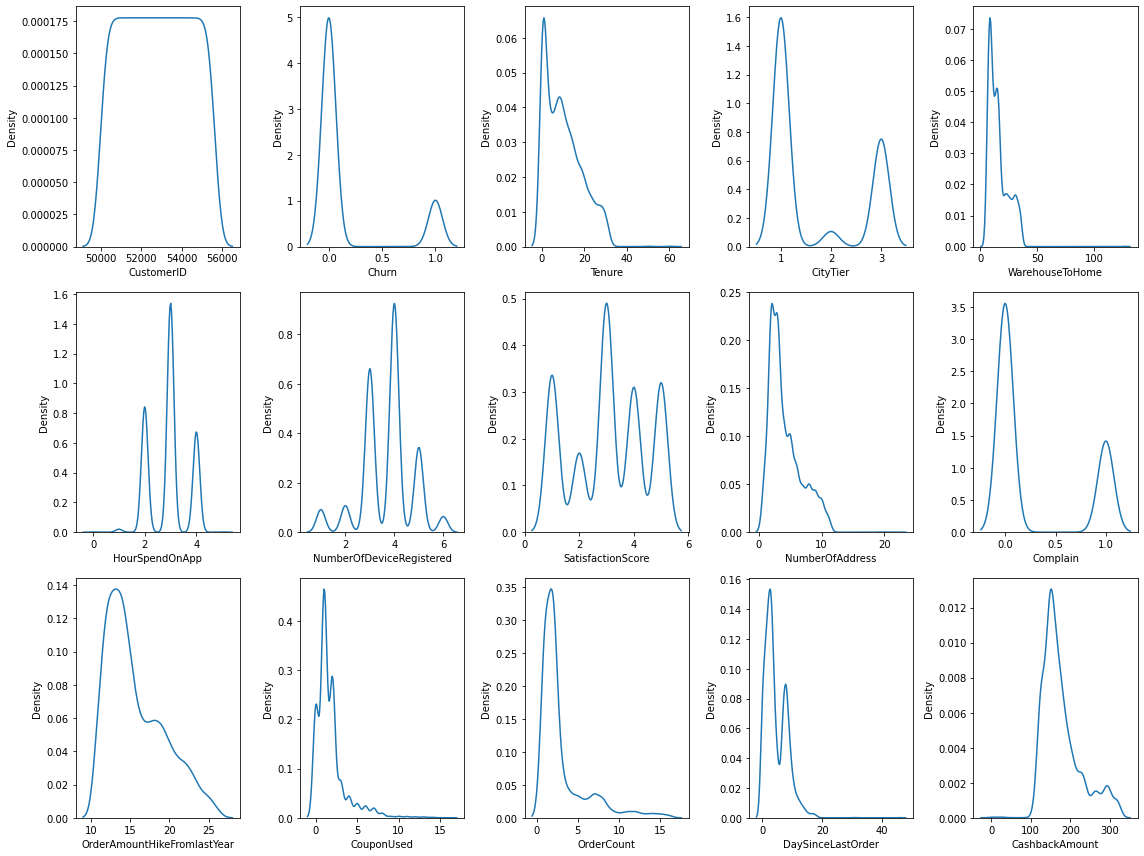

In [50]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.kdeplot(x = df[num[i]])
    plt.tight_layout()

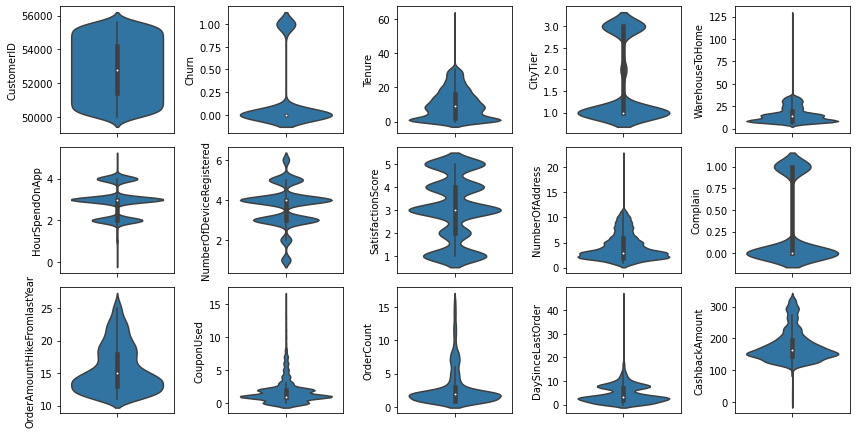

In [51]:
plt.figure(figsize = (12,6))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.violinplot(y = df[num[i]])
    plt.tight_layout()

In [52]:
num

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

Dari Hasil observasi diatas kita dapat melihat beberapa hal menarik

1. Uniform distribution: CustomerID --> karena ini adalah ID dan sangat banyak value unique, maka kita akan drop pada saat preprocessing
2. Right-skewed: Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder memiliki distribusi right skewed atau positively skewed, kita akan mentransformasi kolom ini dengan menggunakan log transformation
3. Left-skewed: CashbackAmount

karena ada beberapa column yang memiliki left-skewed distribution maka kita akan melakukan square transformation agar distribusi kolom-kolom tersebut akan mendekati normal. 

In [53]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [54]:
df['CustomerID'].nunique()

5630

In [55]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [56]:
def group_df_uni(col):
    ndf = df.groupby(col).agg({'CustomerID':'nunique'}).reset_index()
    ndf['percentage'] = (ndf['CustomerID']/df['CustomerID'].nunique()) * 100
    return ndf

def plot_bar_uni(col):
    df1 = group_df_uni(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'CustomerID', data = df1, ax = ax[0], ci = None)
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', data = df1, ax = ax[1], ci = None)
    show_val_percent(ax[1])

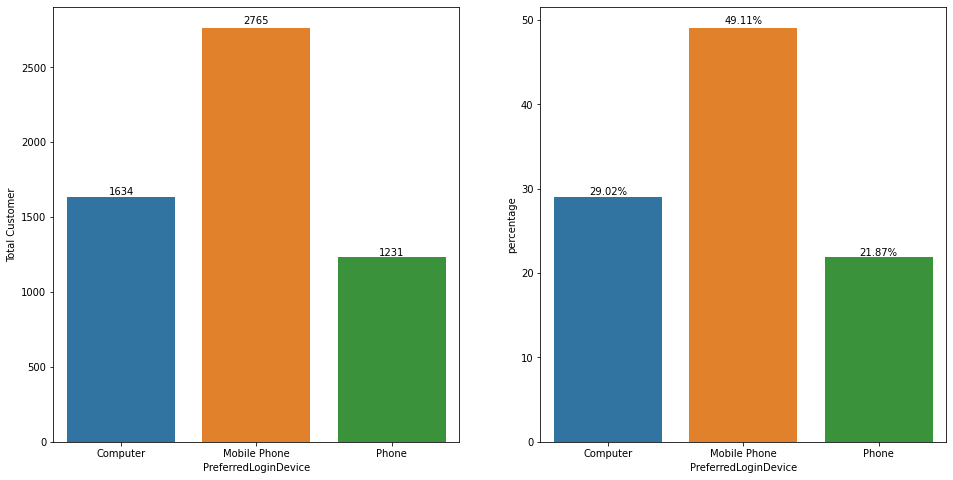

In [57]:
plot_bar_uni('PreferredLoginDevice')

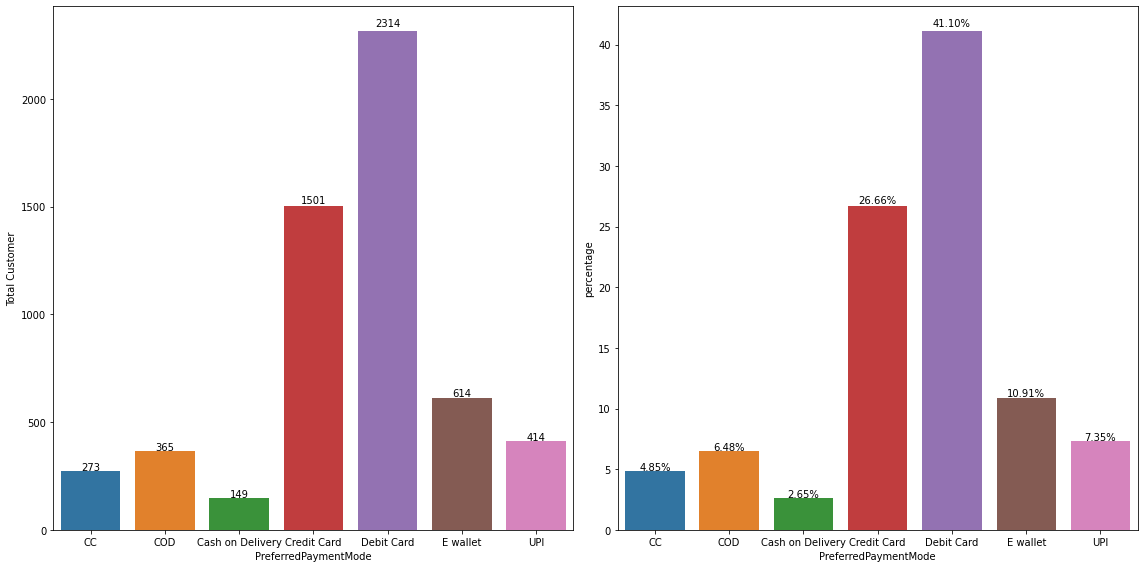

In [58]:
plot_bar_uni('PreferredPaymentMode')
plt.tight_layout()

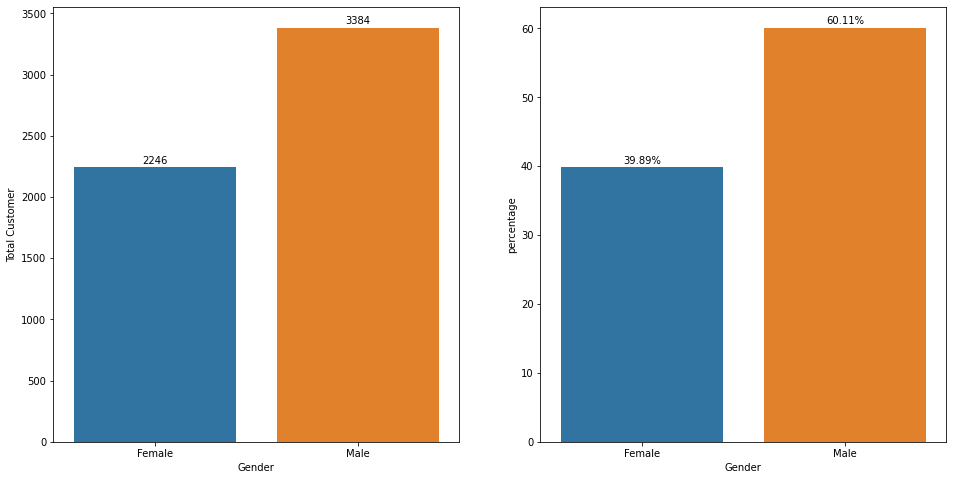

In [59]:
plot_bar_uni('Gender')

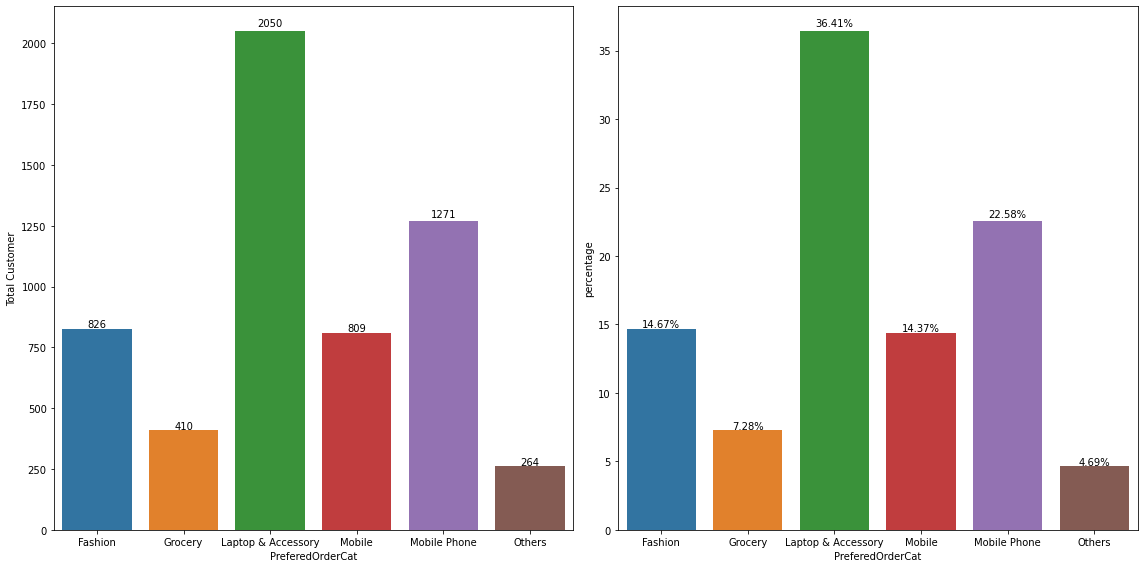

In [60]:
plot_bar_uni('PreferedOrderCat')
plt.tight_layout()

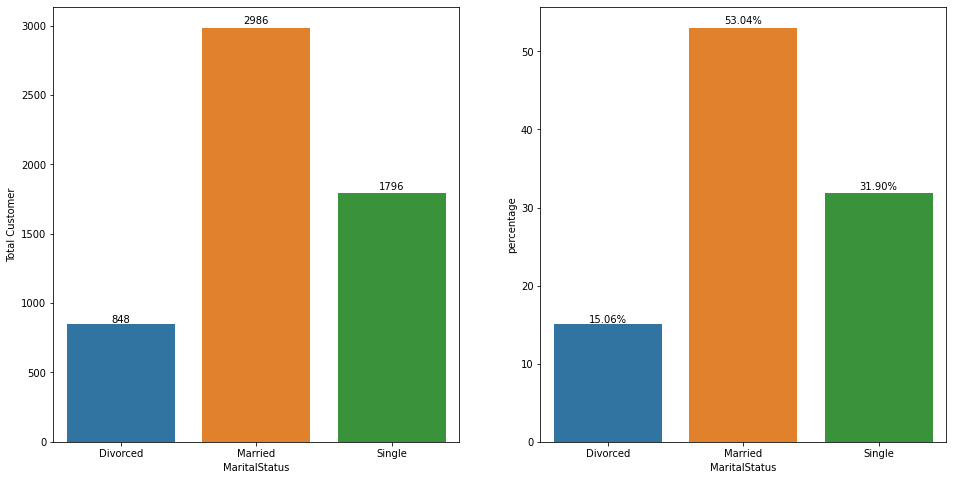

In [61]:
plot_bar_uni('MaritalStatus')

Pada PreferredPaymentMode terlihat credit card dan debit card sangat mendominasi. pada PreferedOrderCat juga terlihat bahwa ada 1 value yang mendominasi. Namun, karena dominasi tidak terlalu ekstrim, maka tidak perlu dilakukan preprocess pada data.

## Multivariate Analysis

In [62]:
plt.style.use('fivethirtyeight')

In [63]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [64]:
def group_df_churn(col):
    ndf = df.groupby([col, 'Churn']).agg({'CustomerID':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'CustomerID':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['CustomerID_x']/ndf['CustomerID_y']) * 100
    return ndf

def plot_box(col):
    df1 = group_df_churn(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'CustomerID_x', hue = 'Churn', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Churn', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def plot_continuous(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Churn', y = col, data = df, ax = ax[0])
    sns.histplot(x = col, hue = 'Churn', data = df, ax = ax[1])

## Categorical

### PreferredLoginDevice

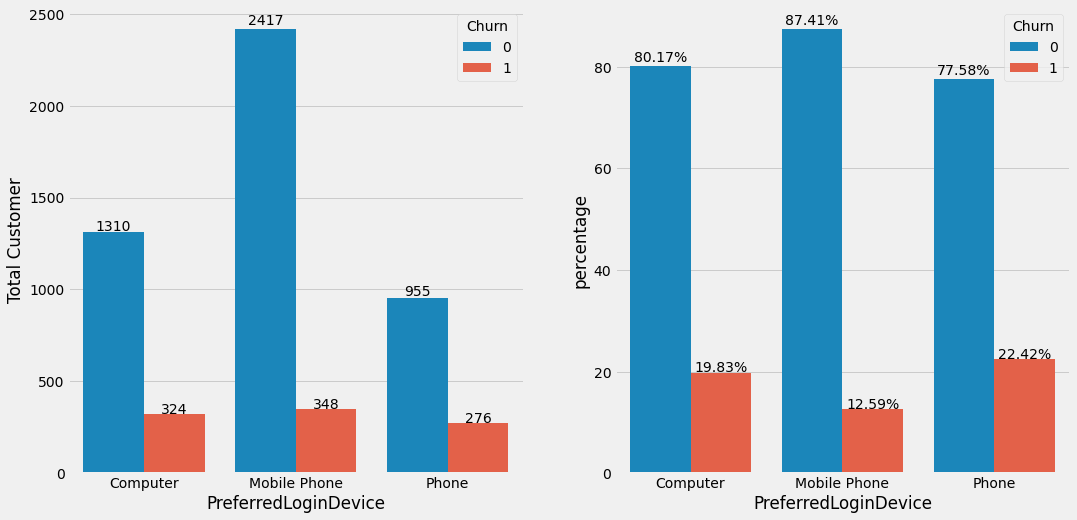

In [65]:
plot_box('PreferredLoginDevice')

### CityTier

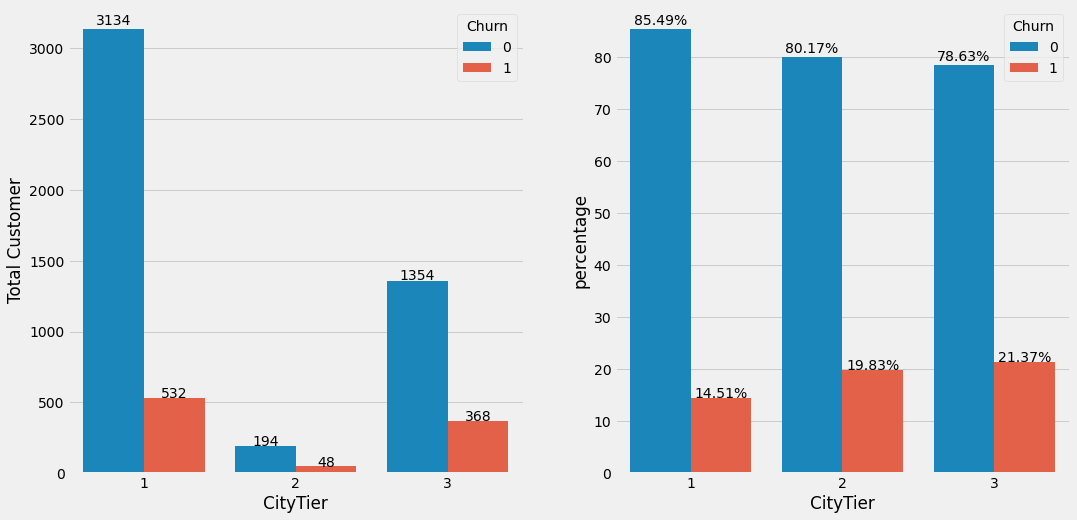

In [66]:
plot_box('CityTier')

### PreferredPaymentMode

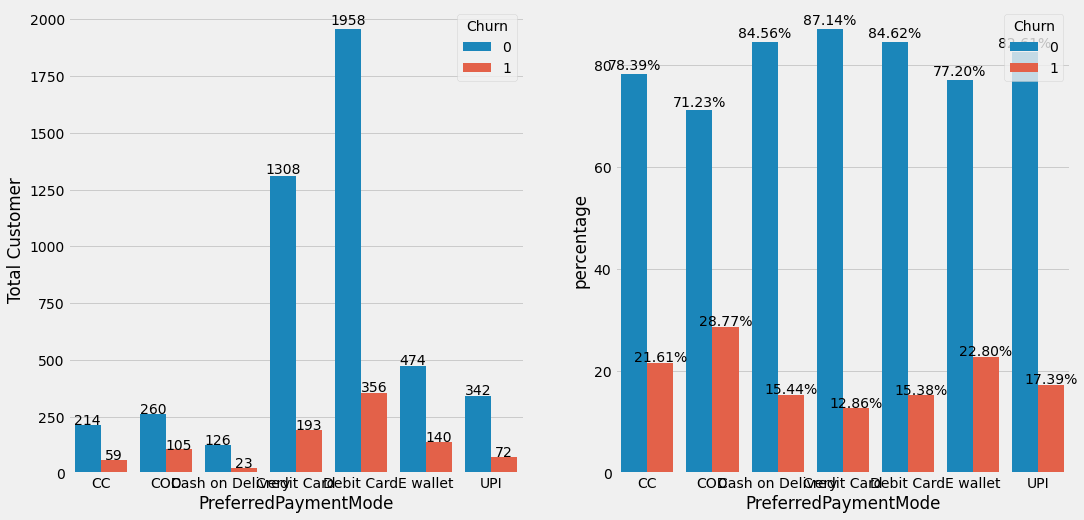

In [67]:
plot_box('PreferredPaymentMode')

### Gender

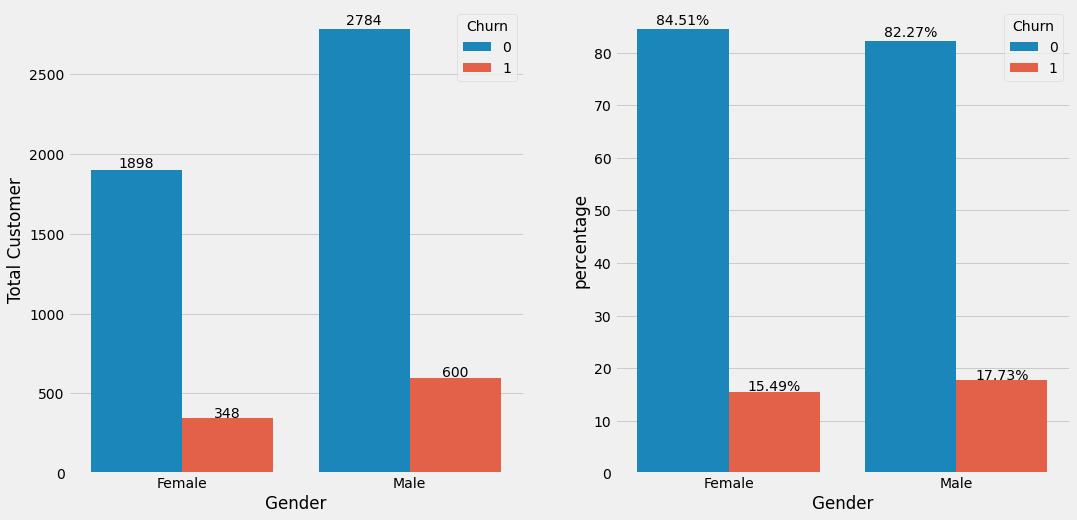

In [68]:
plot_box('Gender')

### PreferedOrderCat

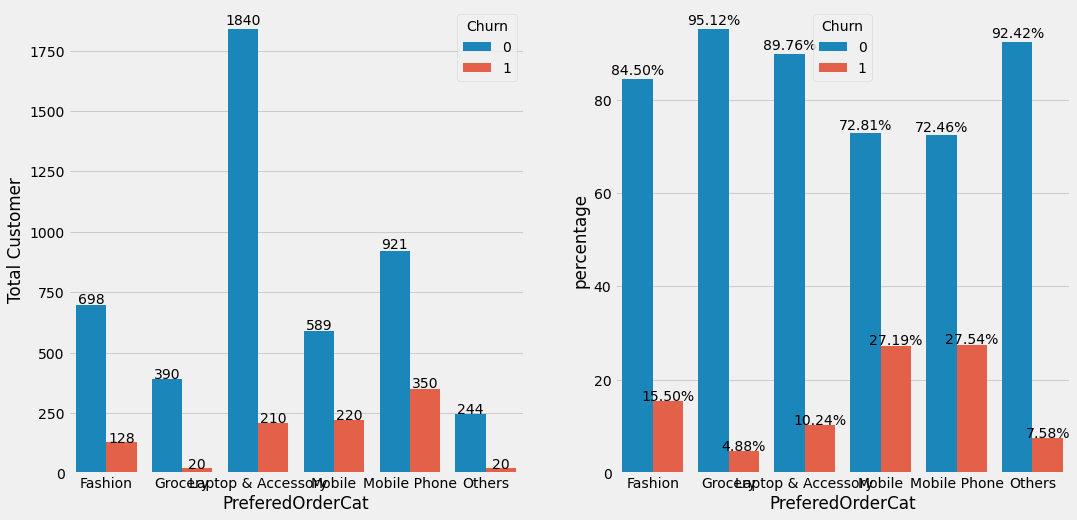

In [69]:
plot_box('PreferedOrderCat')

### SatisfactionScore

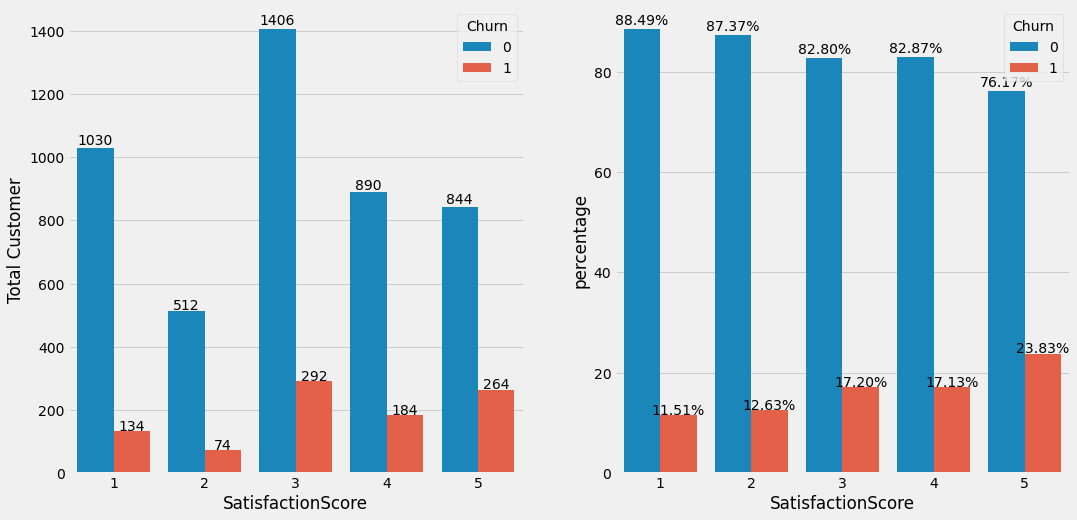

In [70]:
plot_box('SatisfactionScore')

### MaritalStatus

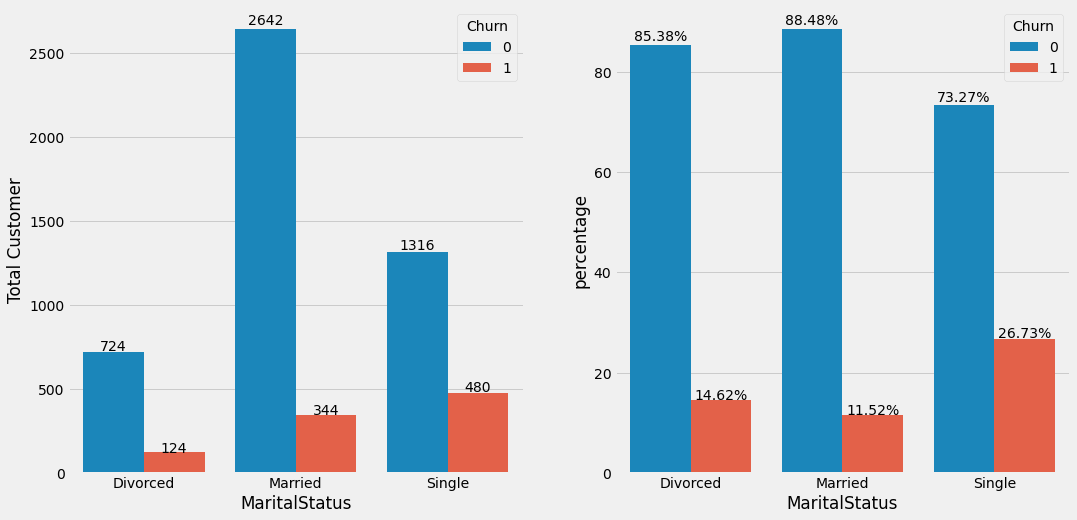

In [71]:
plot_box('MaritalStatus')

### Complain

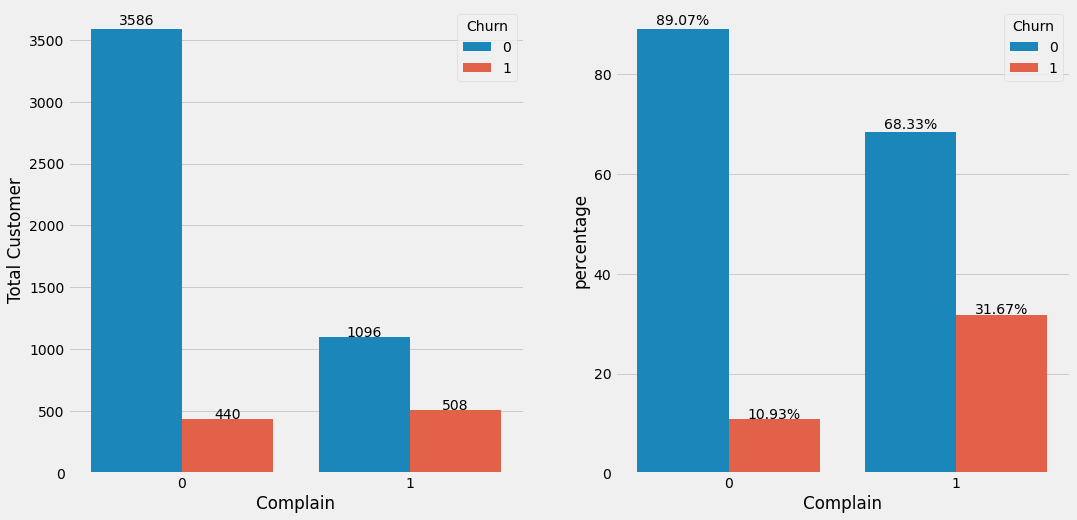

In [72]:
plot_box('Complain')

## Numerical Columns

### Tenure

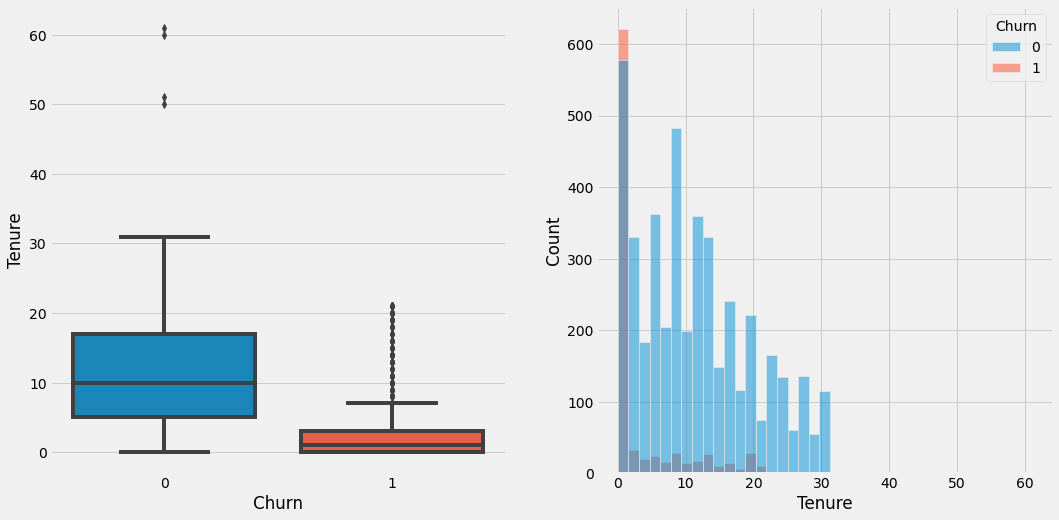

In [73]:
plot_continuous('Tenure')

### WarehouseToHome

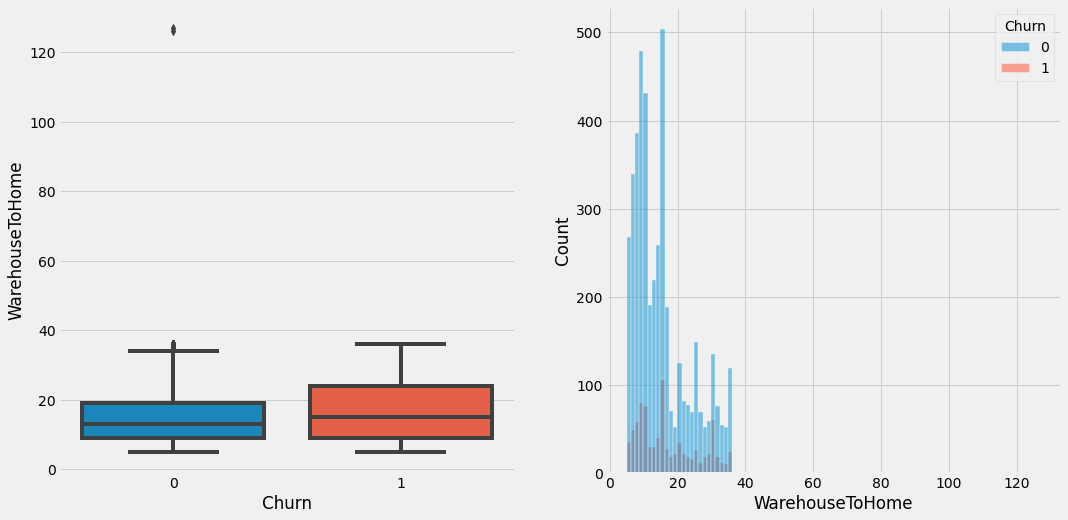

In [74]:
plot_continuous('WarehouseToHome')

### HourSpendOnApp

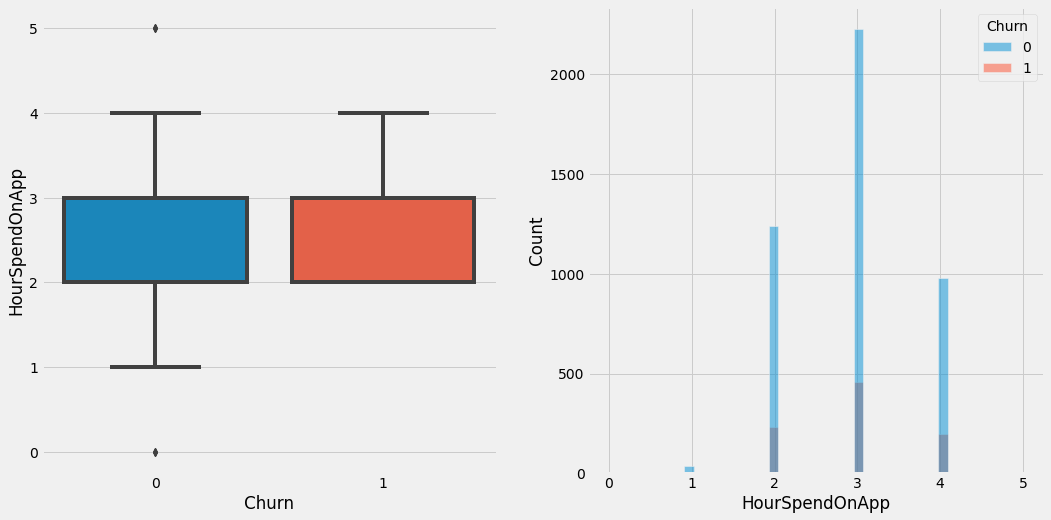

In [75]:
plot_continuous('HourSpendOnApp')

### NumberOfDeviceRegistered

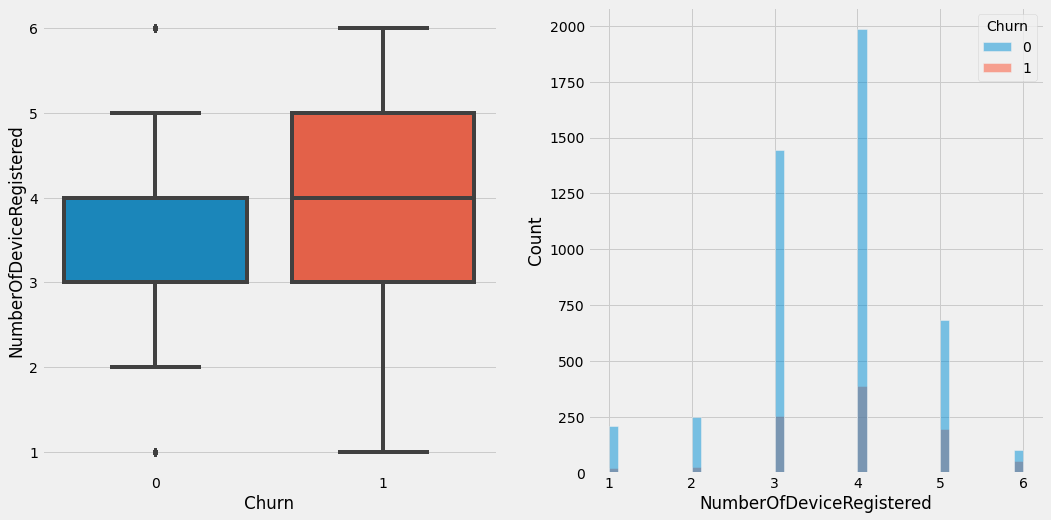

In [76]:
plot_continuous('NumberOfDeviceRegistered')

### NumberOfAddress

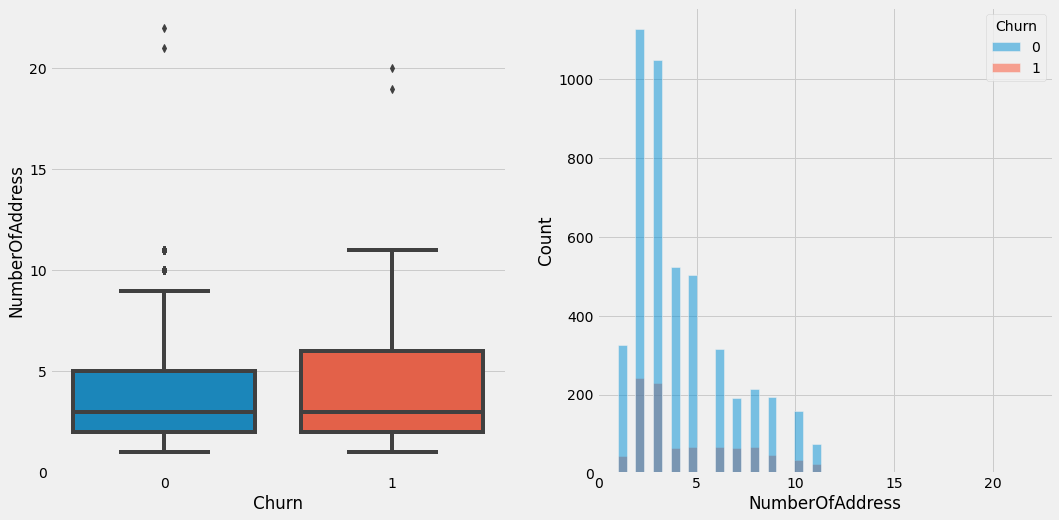

In [77]:
plot_continuous('NumberOfAddress')

### OrderAmountHikeFromlastYear

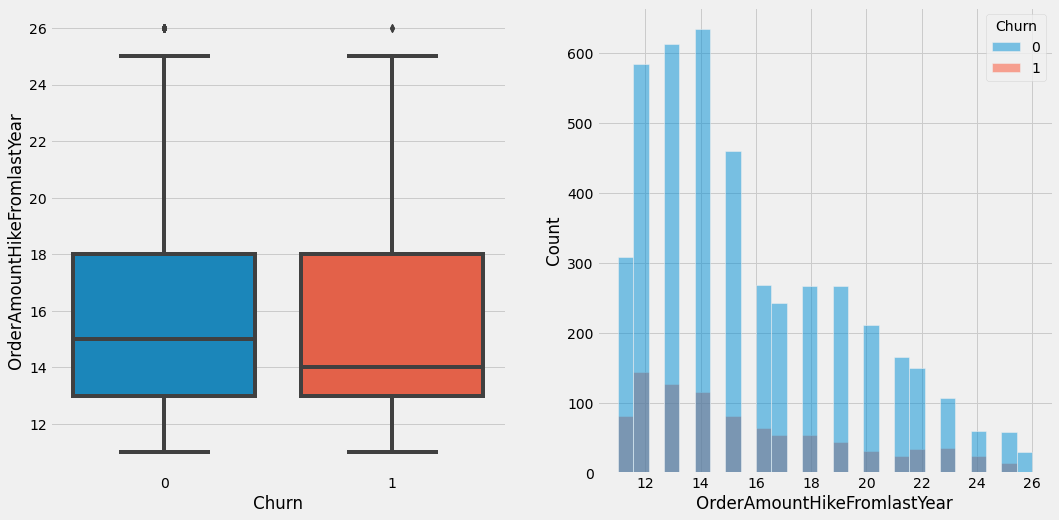

In [78]:
plot_continuous('OrderAmountHikeFromlastYear')

### CouponUsed

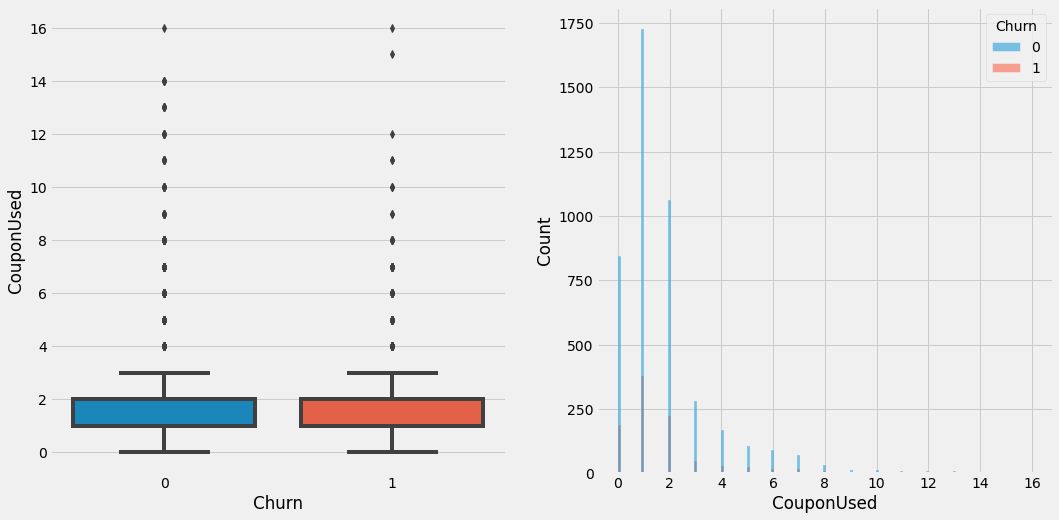

In [79]:
plot_continuous('CouponUsed')

### OrderAmountHikeFromlastYear

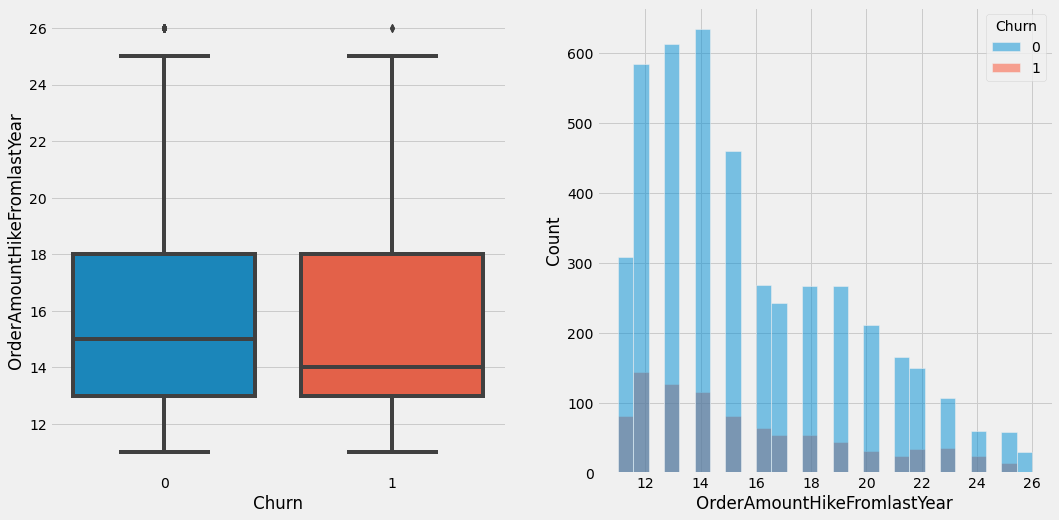

In [80]:
plot_continuous('OrderAmountHikeFromlastYear')

### OrderCount

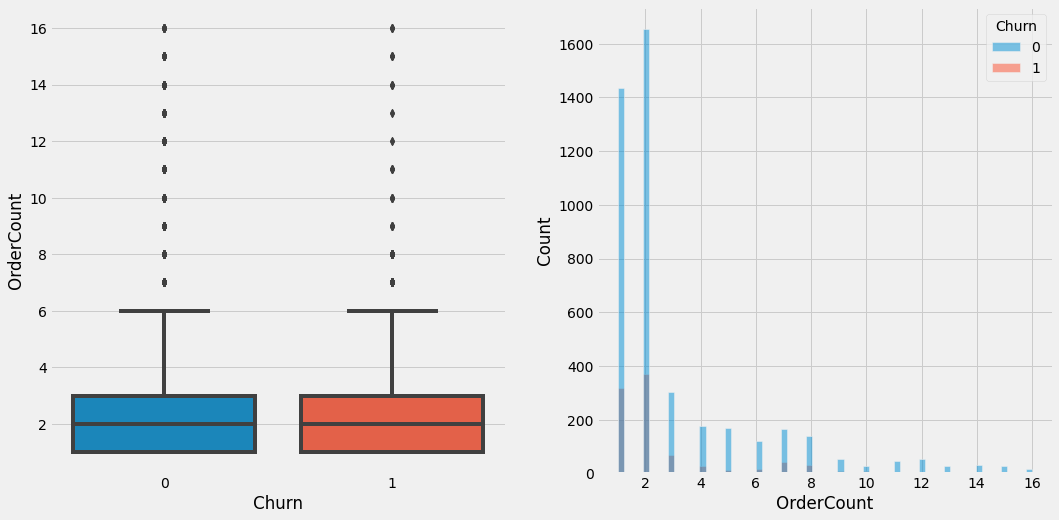

In [81]:
plot_continuous('OrderCount')

### DaySinceLastOrder

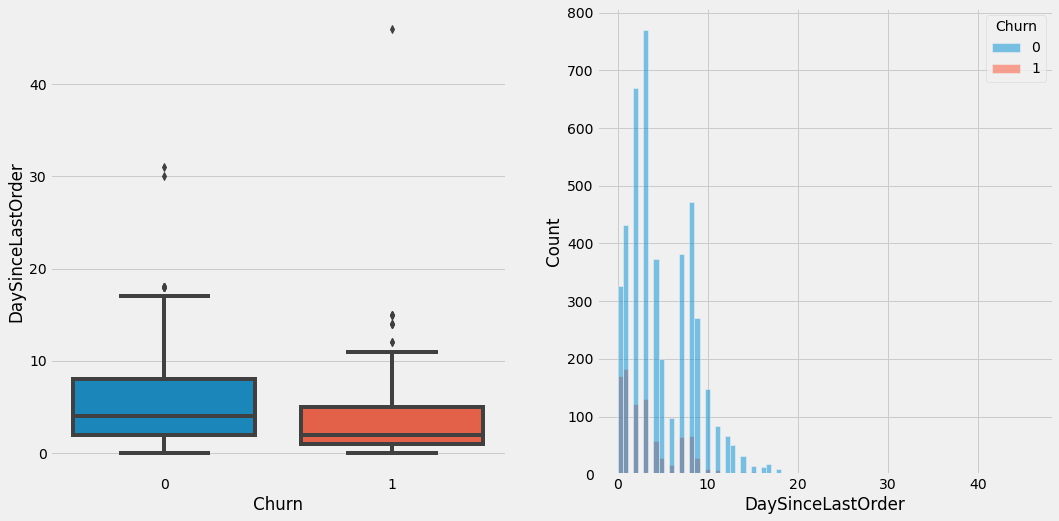

In [82]:
plot_continuous('DaySinceLastOrder')

### CashbackAmount

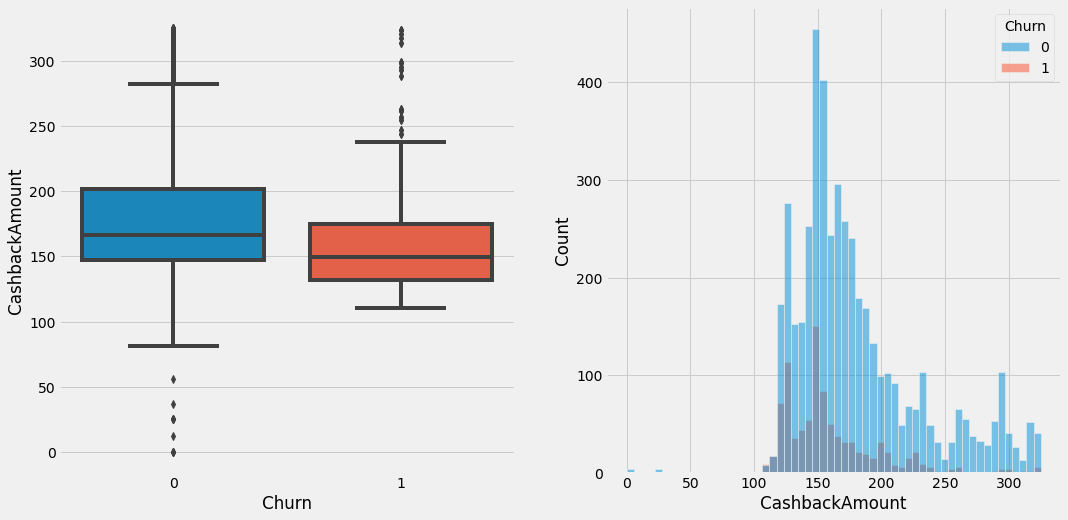

In [83]:
plot_continuous('CashbackAmount')

## Corellation Heatmap

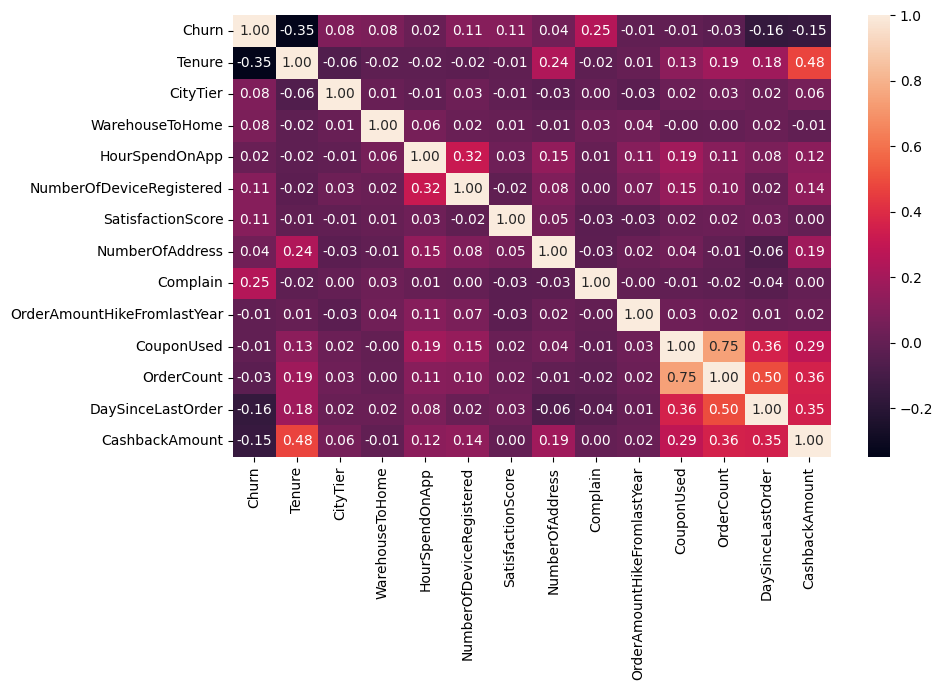

In [163]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.tight_layout()
plt.savefig('heatmap.png')

Dari heatmap diatas, kita dapat melihat fitur-fitur yang memiliki korelasi tinggi dengan target yang relevan untuk memprediksi customer churn. Feature-feature tersebut adalah:
1. Tenure
2. CityTier
3. WarehouseToHome
4. Complain
5. DaySinceLastOrder
6. CashbackAmount

Ada pula beberapa feature yang berkorelasi tinggi, sehingga dapat menimbulkan masalah multicolinearity. Feature-feature tersebut antara lain:

1. CouponUsed dengan OrderCount --> tidak bisa dipakai bersama-sama karena korelasi tinggi. Keduanya tidak dipakai karena korelasi mereka rendah terhadap target.

Dari fitur-fitur tersebut yang akan dipertahankan adalah adalah: semua fitur kecuali CouponUsed

In [85]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [86]:
plt.style.use('default')

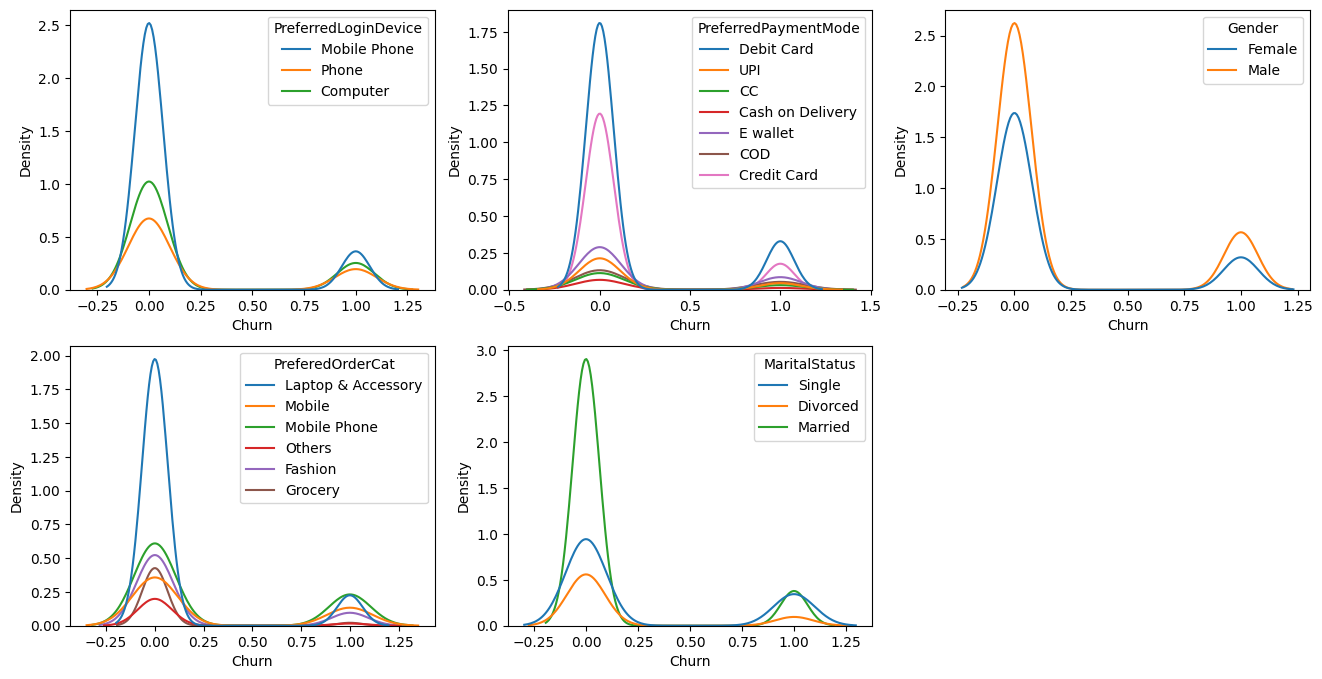

In [87]:
plt.figure(figsize = (16,8))
for i in range(len(cat)):
    plt.subplot(2, round(len(cat)/2)+1, i+1)
    sns.kdeplot(x = 'Churn', hue = cat[i], data = df)

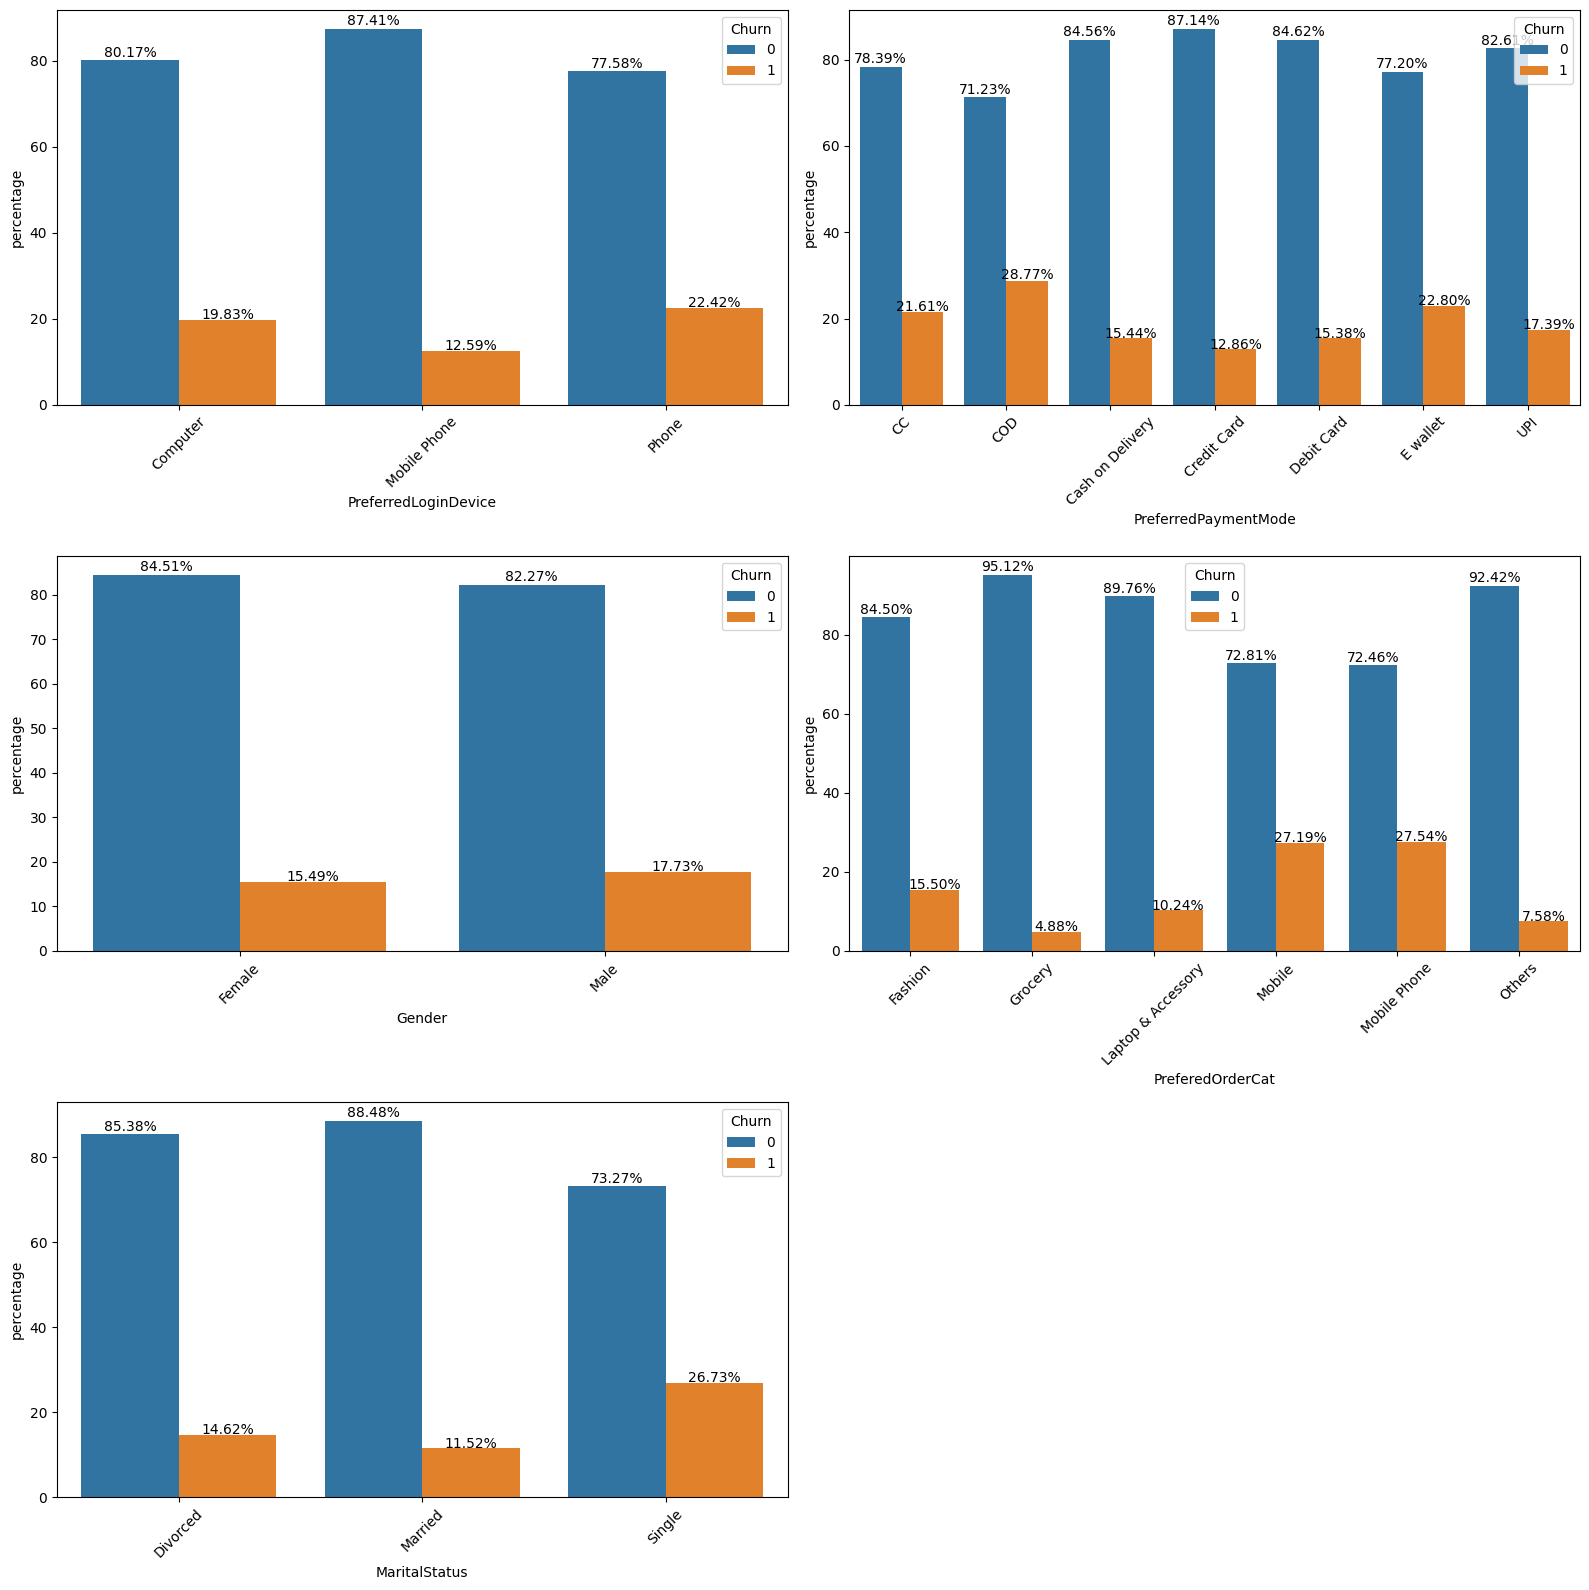

In [88]:
plt.figure(figsize = (16,16))
for i in range(len(cat)):
    plt.subplot(3, round(len(cat)/3), i+1)
    ax = sns.barplot(x = cat[i], y= 'percentage', hue = 'Churn', data = group_df_churn(cat[i]))
    show_val_percent(ax)
    plt.xticks(rotation=45)
    plt.tight_layout()

Dari plot untuk categorical data diatas kita juga dapat menarik kesimpulan, bahwa kolom-kolom categorical yang relevan dan harus dipertahankan adalah:
1. PreferredLoginDevice
2. PreferredPaymentMode
3. PreferedOrderCat
4. MaritalStatus

## Business Insight

In [89]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [90]:
pembayaran_COD = df[df['PreferredPaymentMode'] == 'COD'].groupby(['PreferedOrderCat', 'Churn']).agg({'CustomerID':'nunique'}).reset_index()

In [91]:
pembayaran_COD

PreferedOrderCat  Churn  CustomerID
0             Fashion      0          12
1             Fashion      1           2
2  Laptop & Accessory      0         118
3  Laptop & Accessory      1          13
4              Mobile      0          43
5              Mobile      1          38
6        Mobile Phone      0          87
7        Mobile Phone      1          52

In [92]:
df_single = df[df['MaritalStatus'] == 'Single']

In [93]:
df_Mobile_Phone = df[(df['PreferedOrderCat'] == 'Mobile') | (df['PreferedOrderCat'] == 'Mobile Phone')]

In [94]:
def group_df_churn_MP(col):
    ndf = df_Mobile_Phone.groupby([col, 'Churn']).agg({'CustomerID':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'CustomerID':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['CustomerID_x']/ndf['CustomerID_y']) * 100
    return ndf

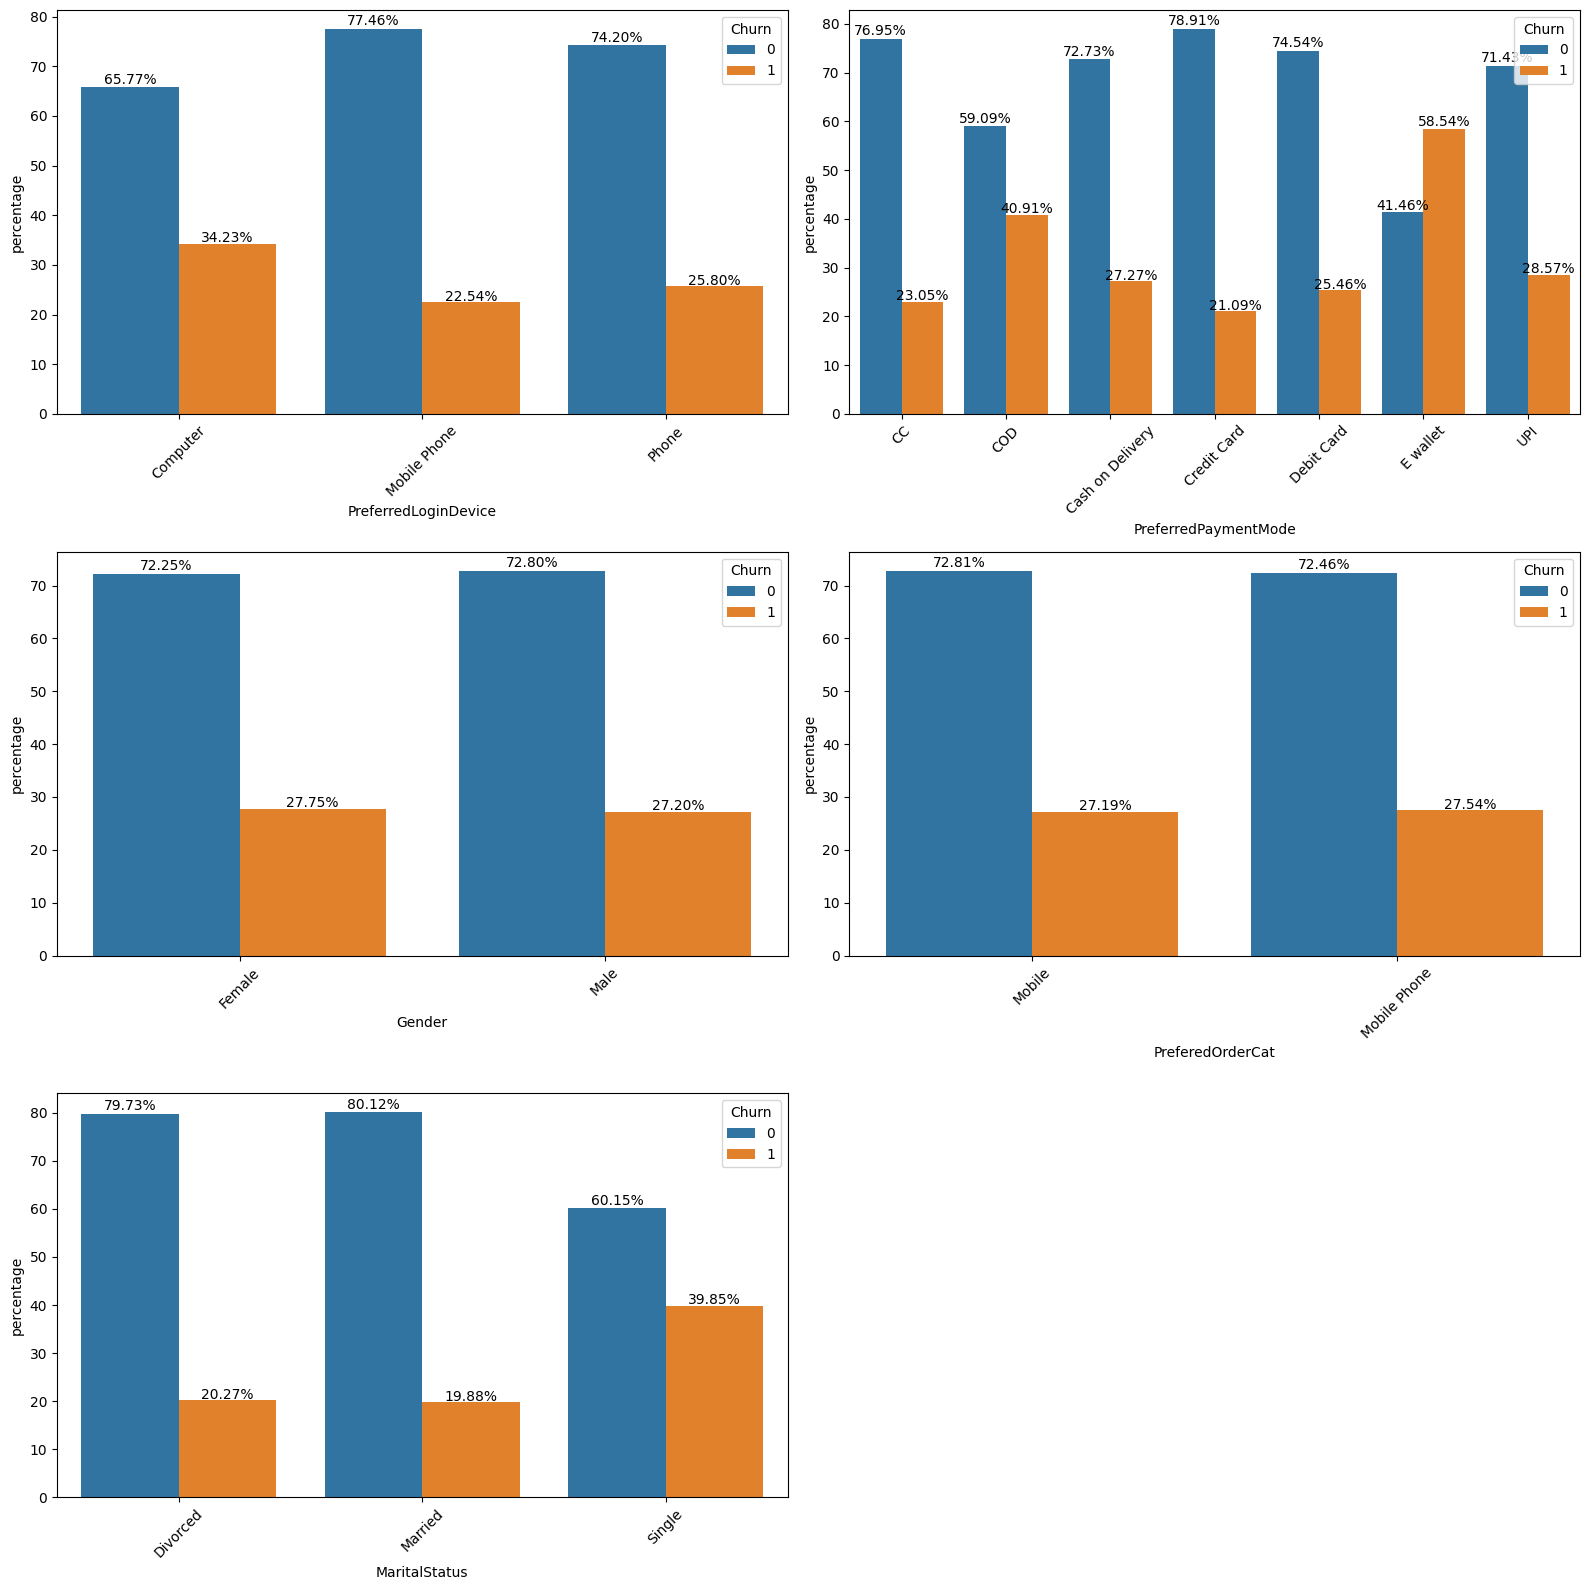

In [95]:
plt.figure(figsize = (16,16))
for i in range(len(cat)):
    plt.subplot(3, round(len(cat)/3), i+1)
    ax = sns.barplot(x = cat[i], y= 'percentage', hue = 'Churn', data = group_df_churn_MP(cat[i]))
    show_val_percent(ax)
    plt.xticks(rotation=45)
    plt.tight_layout()

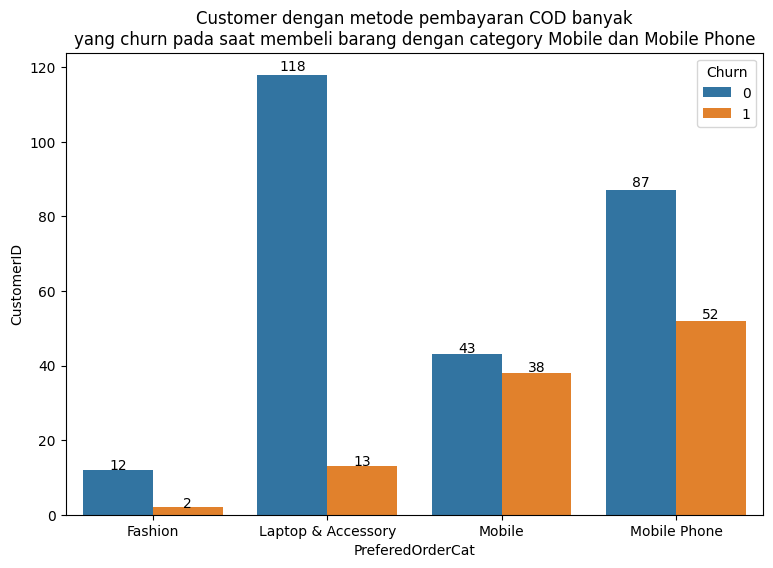

In [96]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'PreferedOrderCat', y = 'CustomerID', hue = 'Churn', data = pembayaran_COD)
show_val_int(ax)
plt.title('Customer dengan metode pembayaran COD banyak\nyang churn pada saat membeli barang dengan category Mobile dan Mobile Phone');

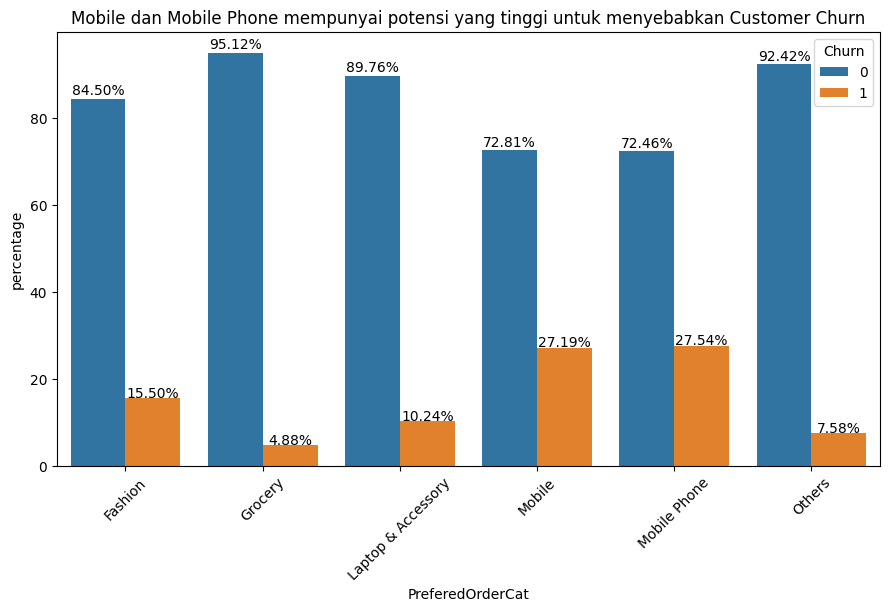

In [97]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = "PreferedOrderCat", y= 'percentage', hue = 'Churn', data = group_df_churn("PreferedOrderCat"))
show_val_percent(ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mobile dan Mobile Phone mempunyai potensi yang tinggi untuk menyebabkan Customer Churn');

In [98]:
df.DaySinceLastOrder.value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

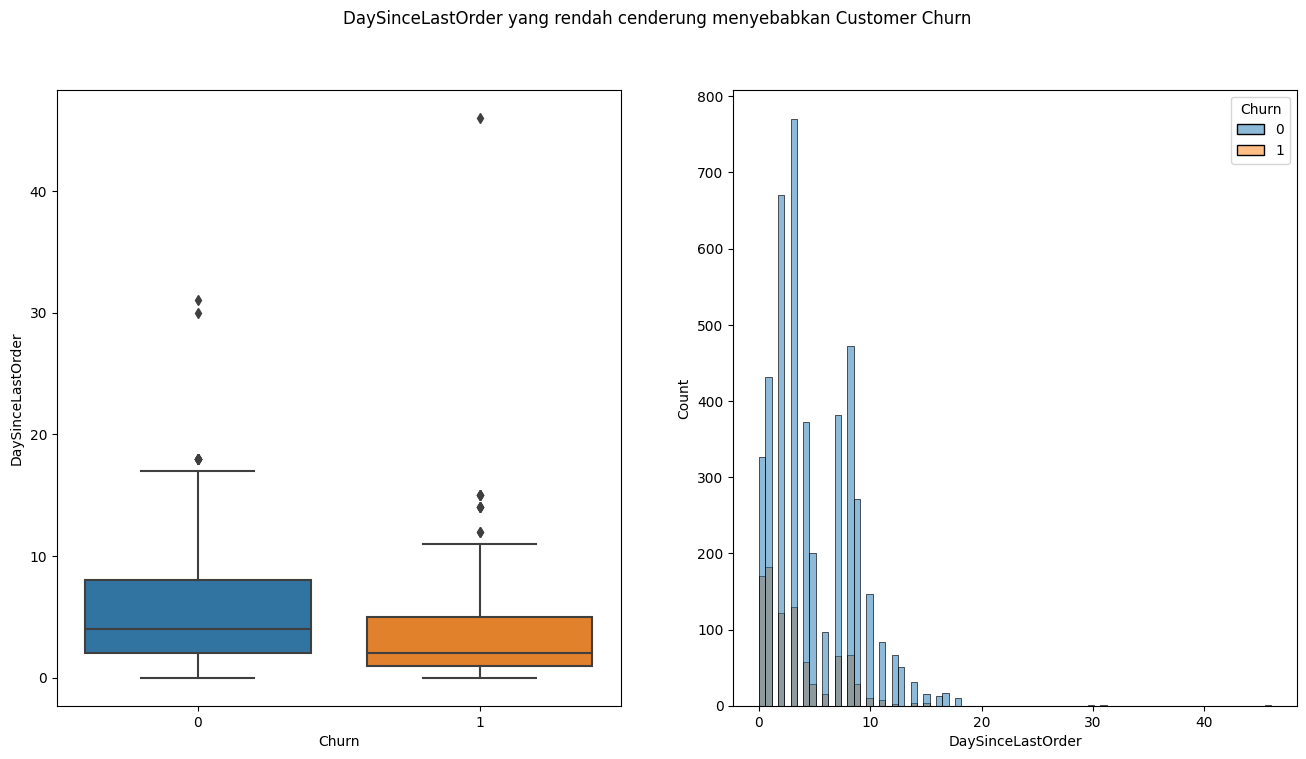

In [99]:
plot_continuous('DaySinceLastOrder')
plt.suptitle('DaySinceLastOrder yang rendah cenderung menyebabkan Customer Churn');

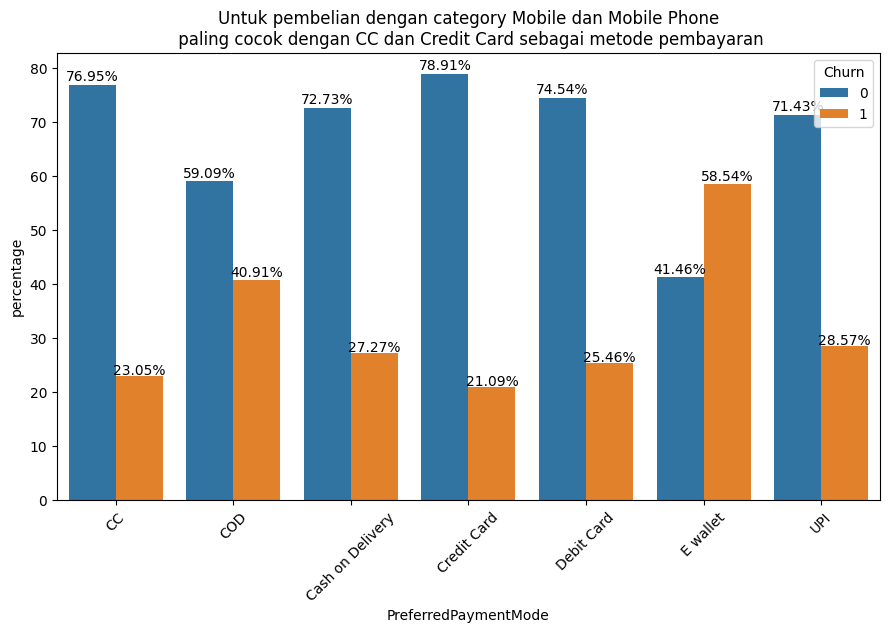

In [100]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'PreferredPaymentMode', y= 'percentage', hue = 'Churn', data = group_df_churn_MP('PreferredPaymentMode'))
show_val_percent(ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Untuk pembelian dengan category Mobile dan Mobile Phone\n paling cocok dengan CC dan Credit Card sebagai metode pembayaran');

1. Customer dengan metode pembayaran COD banyak yang churn pada saat membeli barang dengan category Mobile dan Mobile Phone, Hal ini mungkin disebabkan oleh kurir COD yang kurang ramah dan berpengalaman sehingga menyebabkan barang menjadi cacat atau customer menjadi tidak puas terhadap pelayanannya. Oleh karena itu untuk pembelian barang dengan category Mobile dan Mobile Phone disarankan untuk menghilangkan metode pembayaran COD.


2. Mobile dan mobile phone memiliki potensi yang tinggi untuk menyebabkan customer churn. hal ini mungkin disebabkan karena kualitas barang dan juga mahalnya harga di Ecommerce tersebut, sehingga pelanggan pergi ke Ecommerce lain. Hal yang dapat dilakukan untuk mengatasi ini adalah memberikan pilihan untuk menggunakan asuransi/garansi serta memberikan kupon diskon untuk category Mobile dan Mobile Phone.


3. DaySinceLastOrder yang rendah cenderung menyebabkan customer churn. Hal ini mungkin dapat terjadi karena customer merasa terlalu sering berbelanja online, sehingga ia memutuskan untuk merubah kebiasaan itu dan akhirnya berhenti berbelanja sama sekali. Hal ini dapat kita atasi dengan memberikan voucher setiap beberapa waktu, dalam kasus ini setiap minggu. Dengan melakukan ini, customer akan cenderung menunggu setiap minggu untuk berbelanja, sehingga customer tidak terlalu sering berbelanja.


4. Untuk Pembelian dengan kategori Mobile dan MobilePhone kebanyakan customer yang membayar dengan CC dan Credit Card cenderung lebih jarang churn dibanding dengan metode pembayaran lainnya. Oleh karena itu, kita dapat memberikan promo untuk customer yang mau membeli produk dengan kategori Mobile dan MobilePhone dan membayar dengan CC dan Credit Card sehingga dapat mengurangi jumlah customer yang churn.

# Preprocessing

## Import Library

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [102]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [103]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

## Things to do:

- Split training and unseen data (test data)
- Drop duplicated data
- Drop customerID
- PreferredLoginDevice: merubah category "Mobile Phone" menjadi "Phone"
- PreferredPaymentMode: merubah category CC menjadi Credit Card dan COD menjadi Cash on Delivery
- Handle missing value
- Prevent multicolinearity : drop CouponUsed
- Boxcox transform: Tenure, WarehouseToHome, DaySinceLastOrder
- Handle outlier menggunakan Z-score

In [104]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

## Handle duplicated data

In [105]:
df.duplicated().any()

False

## Drop unused columns and target column

In [106]:
df.drop('CustomerID', axis = 1, inplace = True)

In [107]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

## Splitting Data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Change miscategorize value

In [109]:
X_train['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_train['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

X_test['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_test['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

In [110]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

## Handle Missing Value

In [111]:
for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [112]:
for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())

In [113]:
X_train.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [114]:
X_test.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [115]:
X_train = X_train.drop('CouponUsed', axis = 1)
X_test = X_test.drop('CouponUsed', axis = 1)

In [116]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [117]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [118]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

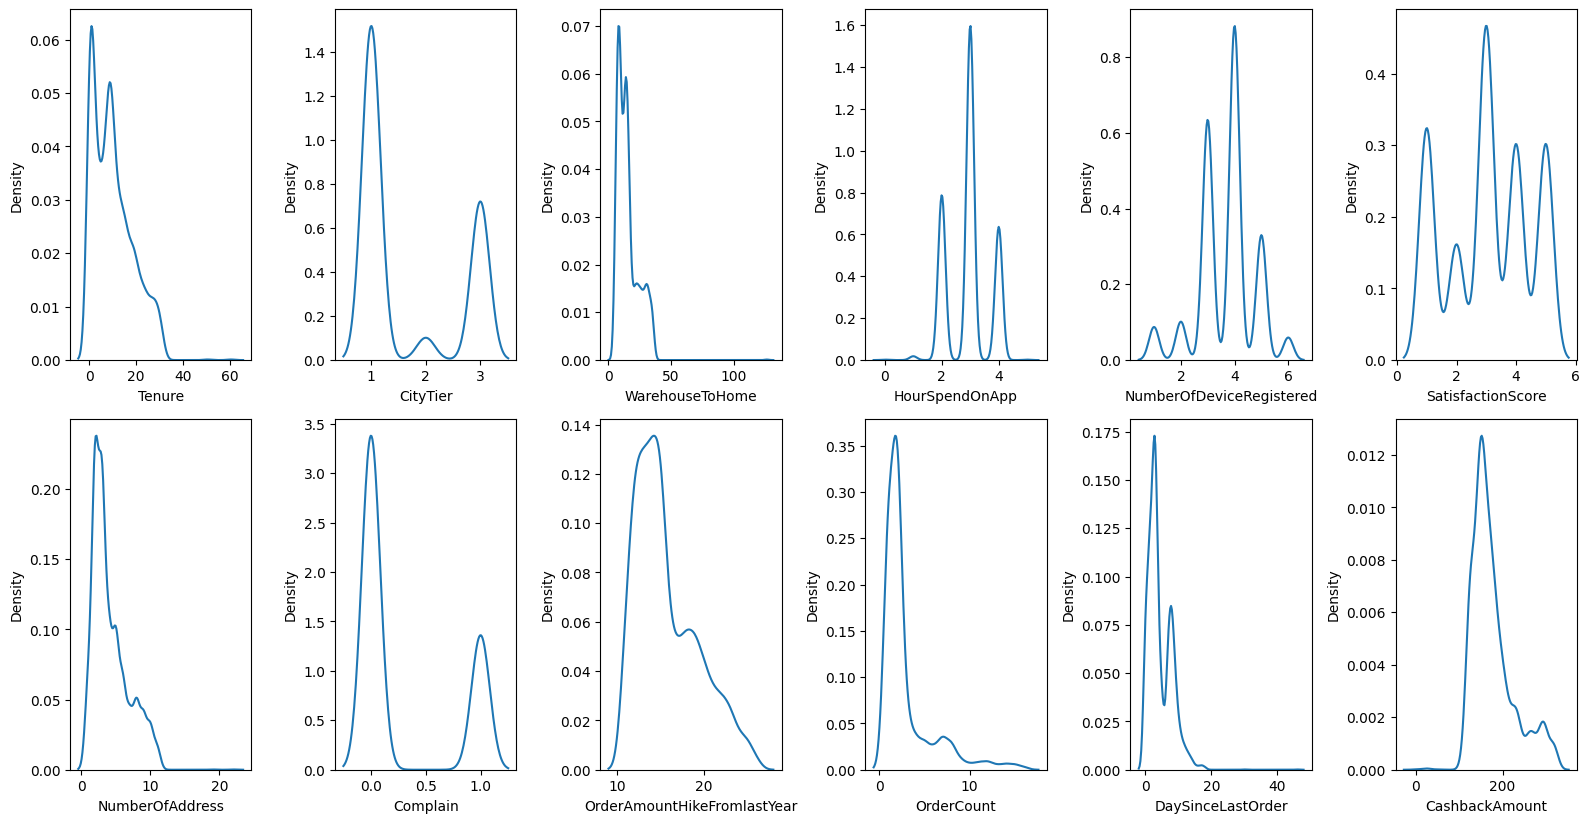

In [119]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

In [120]:
X_train.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

## Remove Outliers

Dengan memakai Z-Score kita akan menghilangkan data-data yang terdeteksi sebagai outlier

In [121]:
outlier = num.copy()
outlier.remove('CityTier')
outlier.remove('Complain')

In [122]:
print(f'Jumlah baris sebelum memfilter outlier: {len(X_train)}')
print(f'Jumlah baris sebelum memfilter outlier: {len(X_test)}')

filtered_entries = np.array([True] * len(X_train))

for col in outlier:
    zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
filtered_entries_test = np.array([True] * len(X_test))

for col in outlier:
    zscore = abs(stats.zscore(X_test[col])) # hitung absolute z-scorenya
    filtered_entries_test = (zscore < 3) & filtered_entries_test # keep yang kurang dari 3 absolute z-scorenya

X_train = X_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
X_test = X_test[filtered_entries_test]

print(f'Jumlah baris setelah memfilter outlier: {len(X_train)}')
print(f'Jumlah baris setelah memfilter outlier: {len(X_test)}')

Jumlah baris sebelum memfilter outlier: 4504
Jumlah baris sebelum memfilter outlier: 1126
Jumlah baris setelah memfilter outlier: 4329
Jumlah baris setelah memfilter outlier: 1078


## Feature Transformation

disini kita akan menggunakan boxcox, log, square root, dan cube root untuk mentransformasi kolom yang mempunyai distribusi right skewed sehingga mendekati distribusi normal

In [123]:
log_col = outlier.copy()
log_col.remove('CashbackAmount')

In [124]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

In [125]:
X_train_transform.describe()

Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  4329.000000  4329.000000      4329.000000     4329.000000   
mean      9.830215     1.658813        15.556711        2.935782   
std       8.221970     0.916206         8.078381        0.700565   
min       0.000000     1.000000         5.000000        1.000000   
25%       2.000000     1.000000         9.000000        2.000000   
50%       9.000000     1.000000        14.000000        3.000000   
75%      15.000000     3.000000        20.000000        3.000000   
max      31.000000     3.000000        36.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               4329.000000        4329.000000      4329.000000   
mean                   3.680065           3.052437         4.182259   
std                    1.021702           1.376551         2.550198   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         6.000000   
max                    6.000000           5.000000        11.000000   

          Complain  OrderAmountHikeFromlastYear   OrderCount  \
count  4329.000000                  4329.000000  4329.000000   
mean      0.288981                    15.681682     2.630169   
std       0.453342                     3.585610     2.169935   
min       0.000000                    11.000000     1.000000   
25%       0.000000                    13.000000     1.000000   
50%       0.000000                    15.000000     2.000000   
75%       1.000000                    18.000000     3.000000   
max       1.000000                    26.000000    11.000000   

       DaySinceLastOrder  CashbackAmount  
count        4329.000000     4329.000000  
mean            4.238623      174.665161  
std             3.276693       46.416563  
min             0.000000       37.000000  
25%             2.000000      145.340000  
50%             3.000000      161.920000  
75%             7.000000      191.520000  
max            15.000000      324.430000

In [126]:
X_train_transform

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
4478     1.0                Phone         1             12.0   
3685    17.0                Phone         1             13.0   
731      0.0                Phone         1              9.0   
291      9.0             Computer         1              8.0   
184      4.0                Phone         1             11.0   
...      ...                  ...       ...              ...   
3772     1.0                Phone         1             27.0   
5191    10.0                Phone         3             16.0   
5226     7.0                Phone         1             11.0   
5390     1.0                Phone         1             36.0   
860      0.0                Phone         1             28.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4478           Debit Card  Female             3.0                         4   
3685          Credit Card  Female             4.0                         5   
731            Debit Card    Male             3.0                         4   
291            Debit Card    Male             2.0                         3   
184      Cash on Delivery    Male             2.0                         3   
...                   ...     ...             ...                       ...   
3772           Debit Card    Male             4.0                         4   
5191             E wallet    Male             3.0                         4   
5226          Credit Card  Female             3.0                         5   
5390          Credit Card    Male             4.0                         4   
860           Credit Card    Male             3.0                         3   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
4478        Mobile Phone                  4        Single                3   
3685  Laptop & Accessory                  3        Single                3   
731               Mobile                  3        Single                2   
291         Mobile Phone                  2      Divorced                2   
184         Mobile Phone                  2      Divorced                1   
...                  ...                ...           ...              ...   
3772  Laptop & Accessory                  3        Single                2   
5191             Fashion                  1       Married                6   
5226        Mobile Phone                  4       Married               10   
5390        Mobile Phone                  5       Married                3   
860   Laptop & Accessory                  3      Divorced                2   

      Complain  OrderAmountHikeFromlastYear  OrderCount  DaySinceLastOrder  \
4478         1                         13.0         2.0                3.0   
3685         1                         15.0         2.0                9.0   
731          0                         12.0         1.0                2.0   
291          1                         23.0         1.0                0.0   
184          1                         12.0         1.0                3.0   
...        ...                          ...         ...                ...   
3772         0                         15.0         2.0                3.0   
5191         0                         12.0         5.0                3.0   
5226         0                         12.0         2.0                3.0   
5390         0                         14.0         2.0                3.0   
860          1                         15.0         6.0                7.0   

      CashbackAmount  
4478          149.78  
3685          165.81  
731           130.33  
291           117.02  
184           148.21  
...              ...  
3772          147.72  
5191          225.96  
5226          163.38  
5390          164.07  
860           161.79  

[4329 rows x 17 columns]

In [127]:
X_train_transform[log_col].describe()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  4329.000000      4329.000000     4329.000000               4329.000000   
mean      9.830215        15.556711        2.935782                  3.680065   
std       8.221970         8.078381        0.700565                  1.021702   
min       0.000000         5.000000        1.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      15.000000        20.000000        3.000000                  4.000000   
max      31.000000        36.000000        5.000000                  6.000000   

       SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
count        4329.000000      4329.000000                  4329.000000   
mean            3.052437         4.182259                    15.681682   
std             1.376551         2.550198                     3.585610   
min             1.000000         1.000000                    11.000000   
25%             2.000000         2.000000                    13.000000   
50%             3.000000         3.000000                    15.000000   
75%             4.000000         6.000000                    18.000000   
max             5.000000        11.000000                    26.000000   

        OrderCount  DaySinceLastOrder  
count  4329.000000        4329.000000  
mean      2.630169           4.238623  
std       2.169935           3.276693  
min       1.000000           0.000000  
25%       1.000000           2.000000  
50%       2.000000           3.000000  
75%       3.000000           7.000000  
max      11.000000          15.000000

In [128]:
 X_train_transform.loc[X_train_transform['Tenure'] != 0]['Tenure'].min()/2

0.5

In [129]:
for col in log_col:
    X_train_transform.loc[X_train_transform[col] == 0, col] =  X_train_transform.loc[X_train_transform[col] != 0][col].min()/2

In [130]:
X_train_transform.describe()

Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  4329.000000  4329.000000      4329.000000     4329.000000   
mean      9.876761     1.658813        15.556711        2.935782   
std       8.167409     0.916206         8.078381        0.700565   
min       0.500000     1.000000         5.000000        1.000000   
25%       2.000000     1.000000         9.000000        2.000000   
50%       9.000000     1.000000        14.000000        3.000000   
75%      15.000000     3.000000        20.000000        3.000000   
max      31.000000     3.000000        36.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               4329.000000        4329.000000      4329.000000   
mean                   3.680065           3.052437         4.182259   
std                    1.021702           1.376551         2.550198   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         6.000000   
max                    6.000000           5.000000        11.000000   

          Complain  OrderAmountHikeFromlastYear   OrderCount  \
count  4329.000000                  4329.000000  4329.000000   
mean      0.288981                    15.681682     2.630169   
std       0.453342                     3.585610     2.169935   
min       0.000000                    11.000000     1.000000   
25%       0.000000                    13.000000     1.000000   
50%       0.000000                    15.000000     2.000000   
75%       1.000000                    18.000000     3.000000   
max       1.000000                    26.000000    11.000000   

       DaySinceLastOrder  CashbackAmount  
count        4329.000000     4329.000000  
mean            4.284708      174.665161  
std             3.219764       46.416563  
min             0.500000       37.000000  
25%             2.000000      145.340000  
50%             3.000000      161.920000  
75%             7.000000      191.520000  
max            15.000000      324.430000

### Boxcox Transformation

In [131]:
for col in log_col:
    X_train_transform[col] = stats.boxcox(X_train_transform[col])[0]

#### Before Transformation

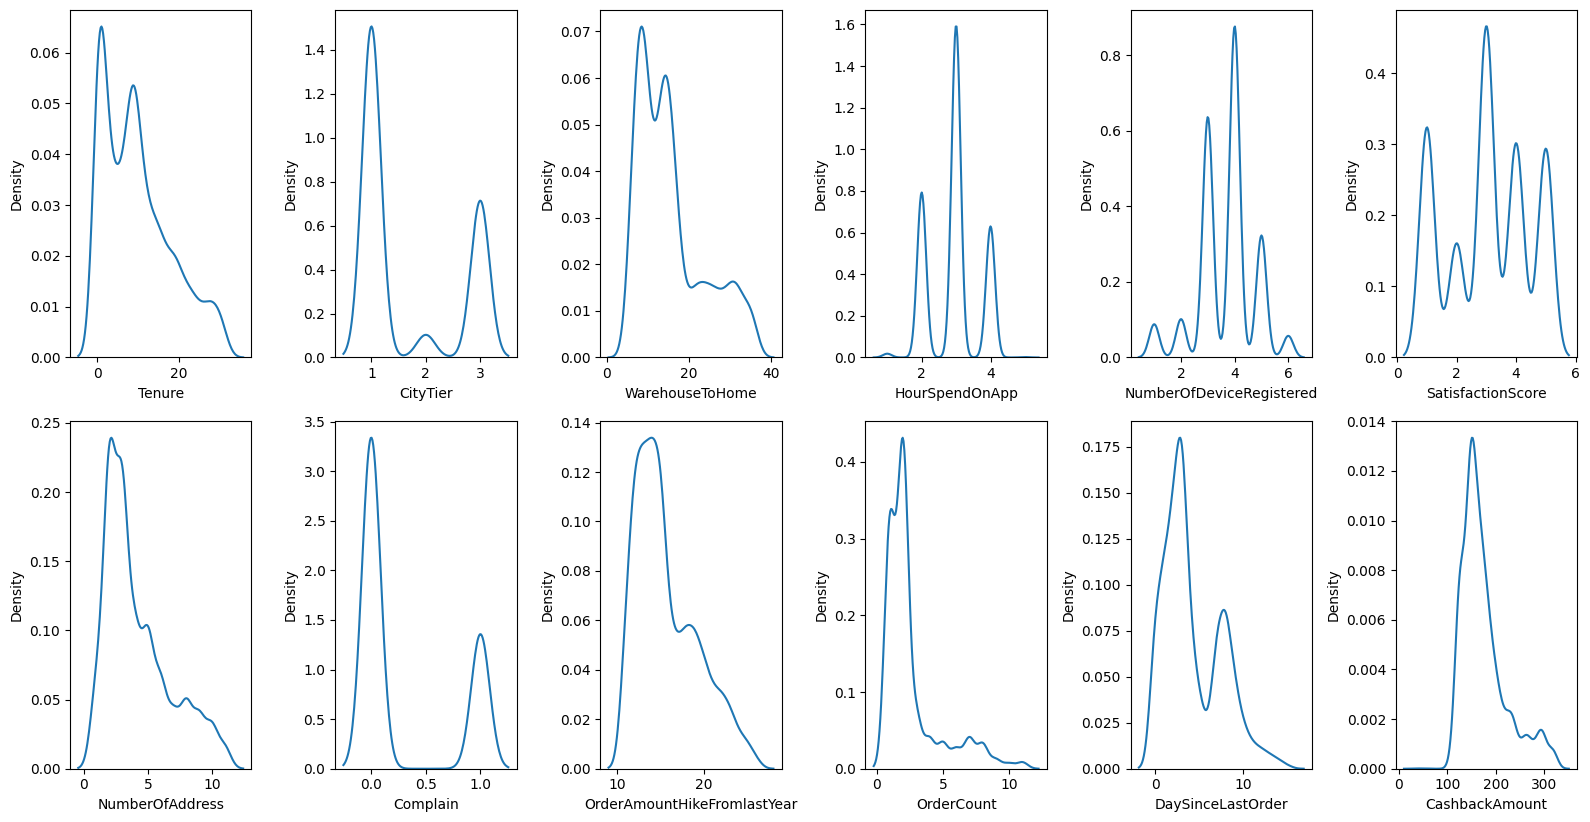

In [132]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

#### After transformation

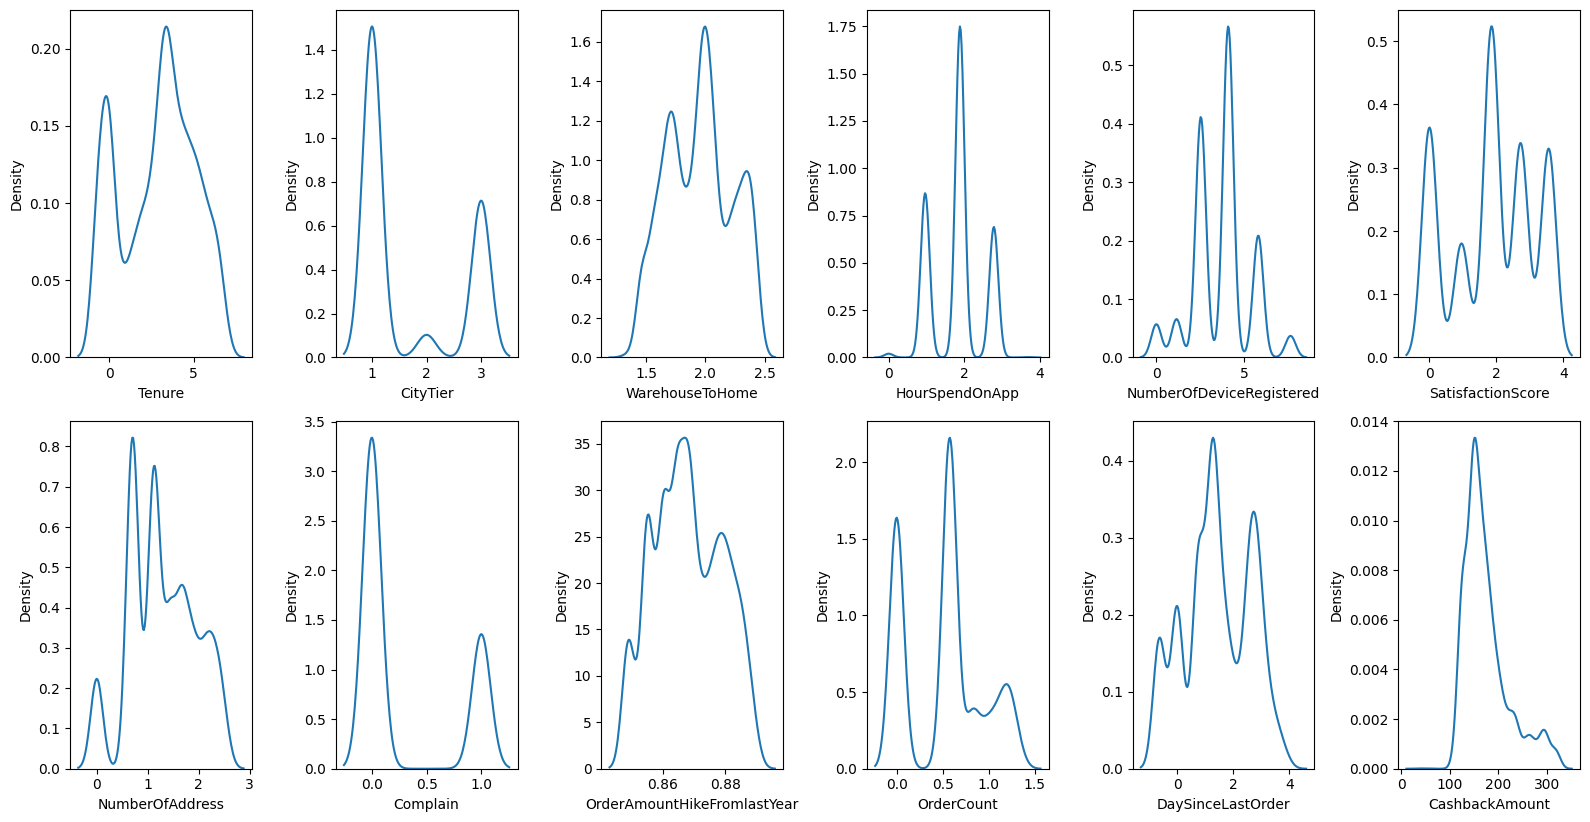

In [133]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_transform[num[i]])
    plt.tight_layout()

### Log Transformation

In [134]:
X_train_log = X_train.copy()

In [135]:
for col in log_col:
    X_train_log.loc[X_train_log[col] == 0, col] =  X_train_log.loc[X_train_log[col] != 0][col].min()/2

In [136]:
for col in log_col:
    X_train_log[col] = np.log(X_train_log[col])

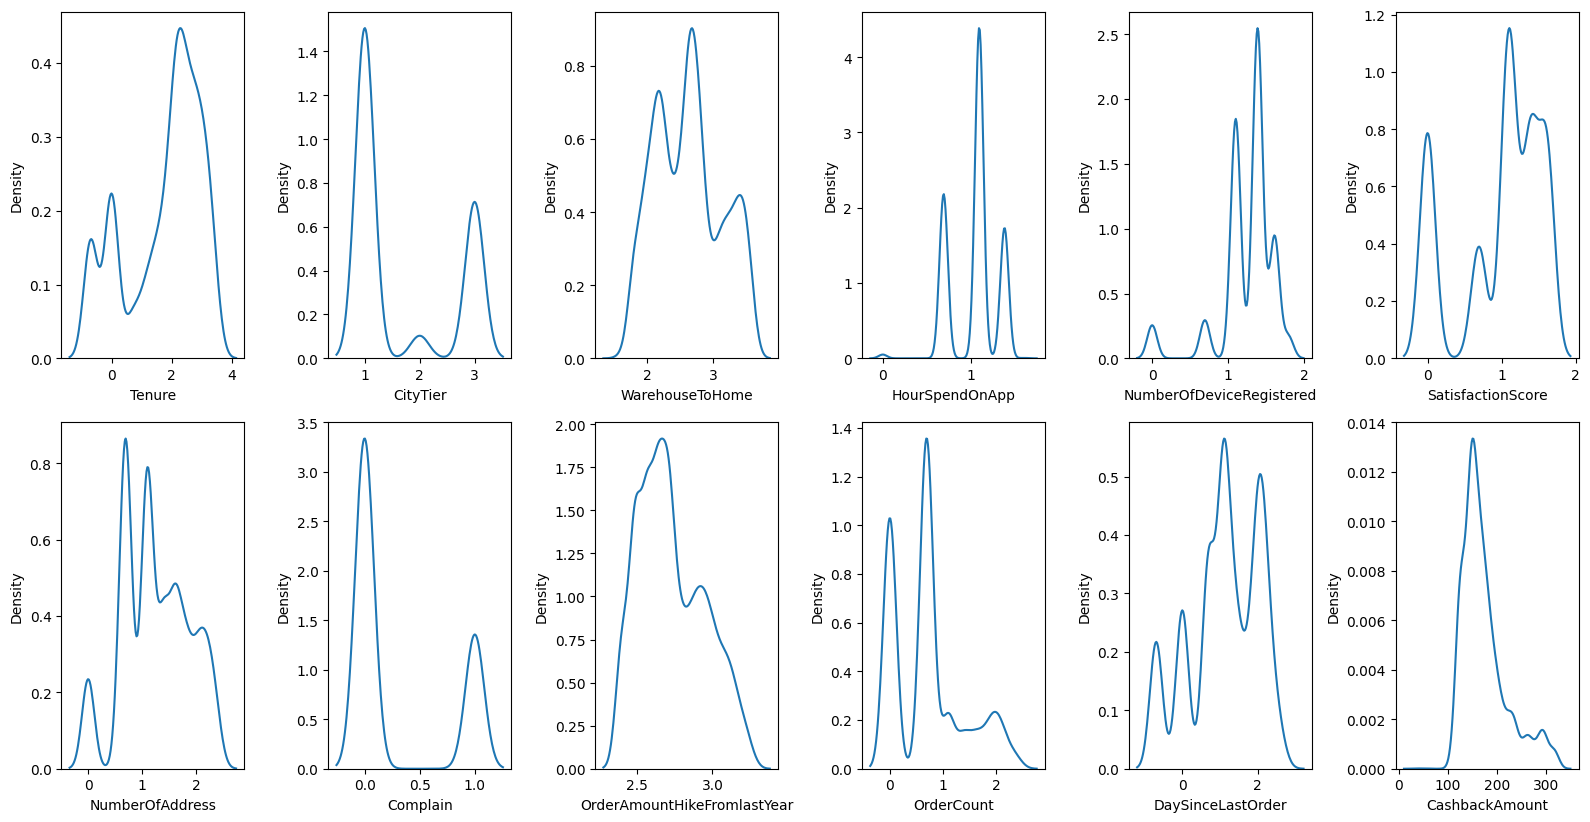

In [137]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_log[num[i]])
    plt.tight_layout()

### Squareroot Transformation

In [138]:
X_train_sqrt = X_train.copy()

# for col in log_col:
#     X_train_sqrt.loc[X_train_sqrt[col] == 0, col] =  X_train_sqrt.loc[X_train_log[col] != 0][col].min()/2

for col in log_col:
    X_train_sqrt[col] = np.sqrt(X_train_sqrt[col])
    


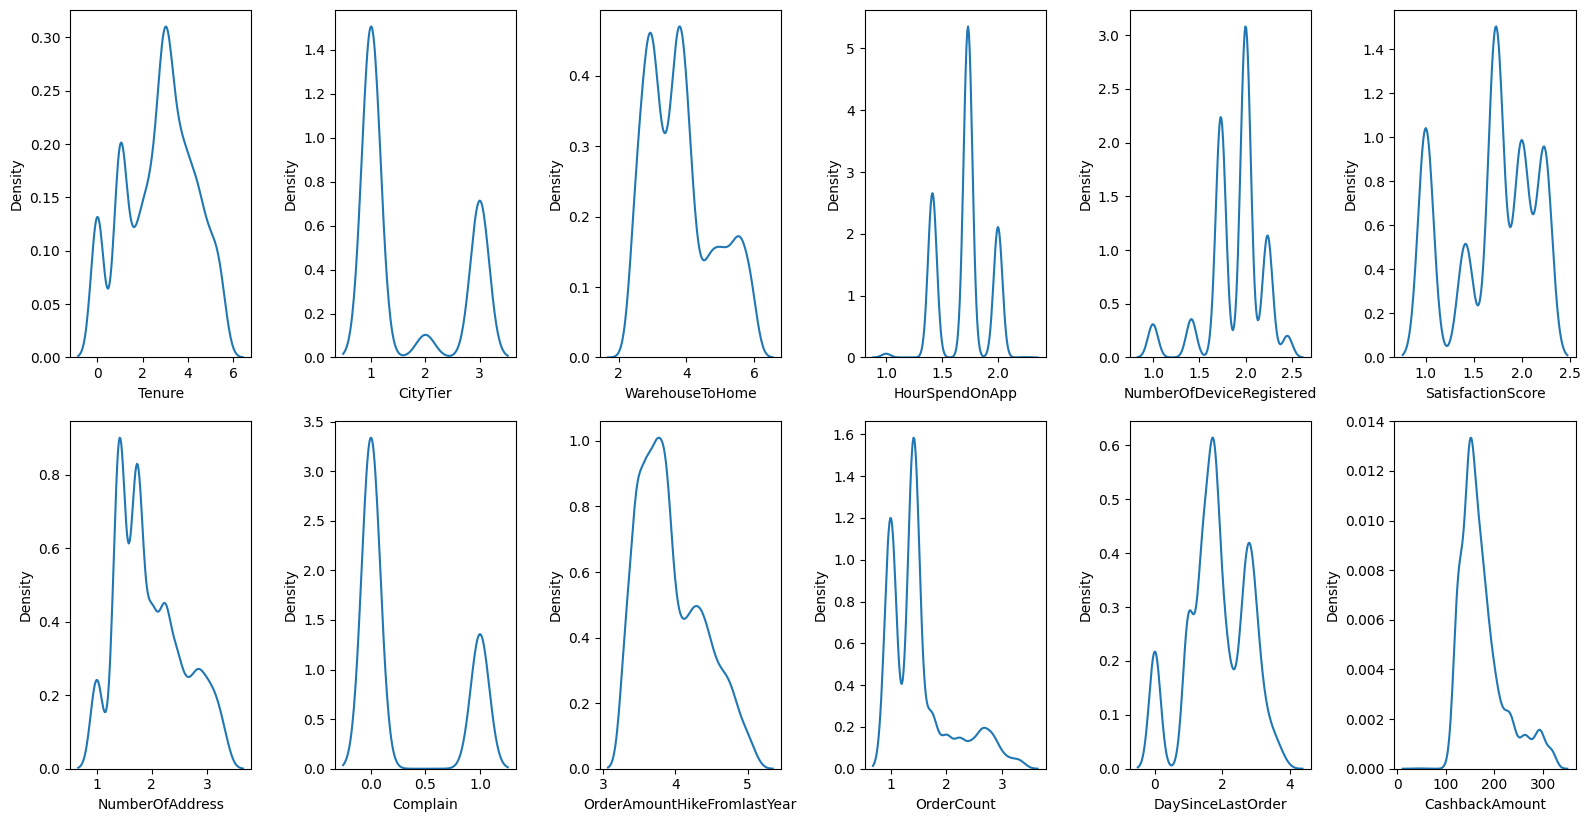

In [139]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_sqrt[num[i]])
    plt.tight_layout()

### Cuberoot Transformation

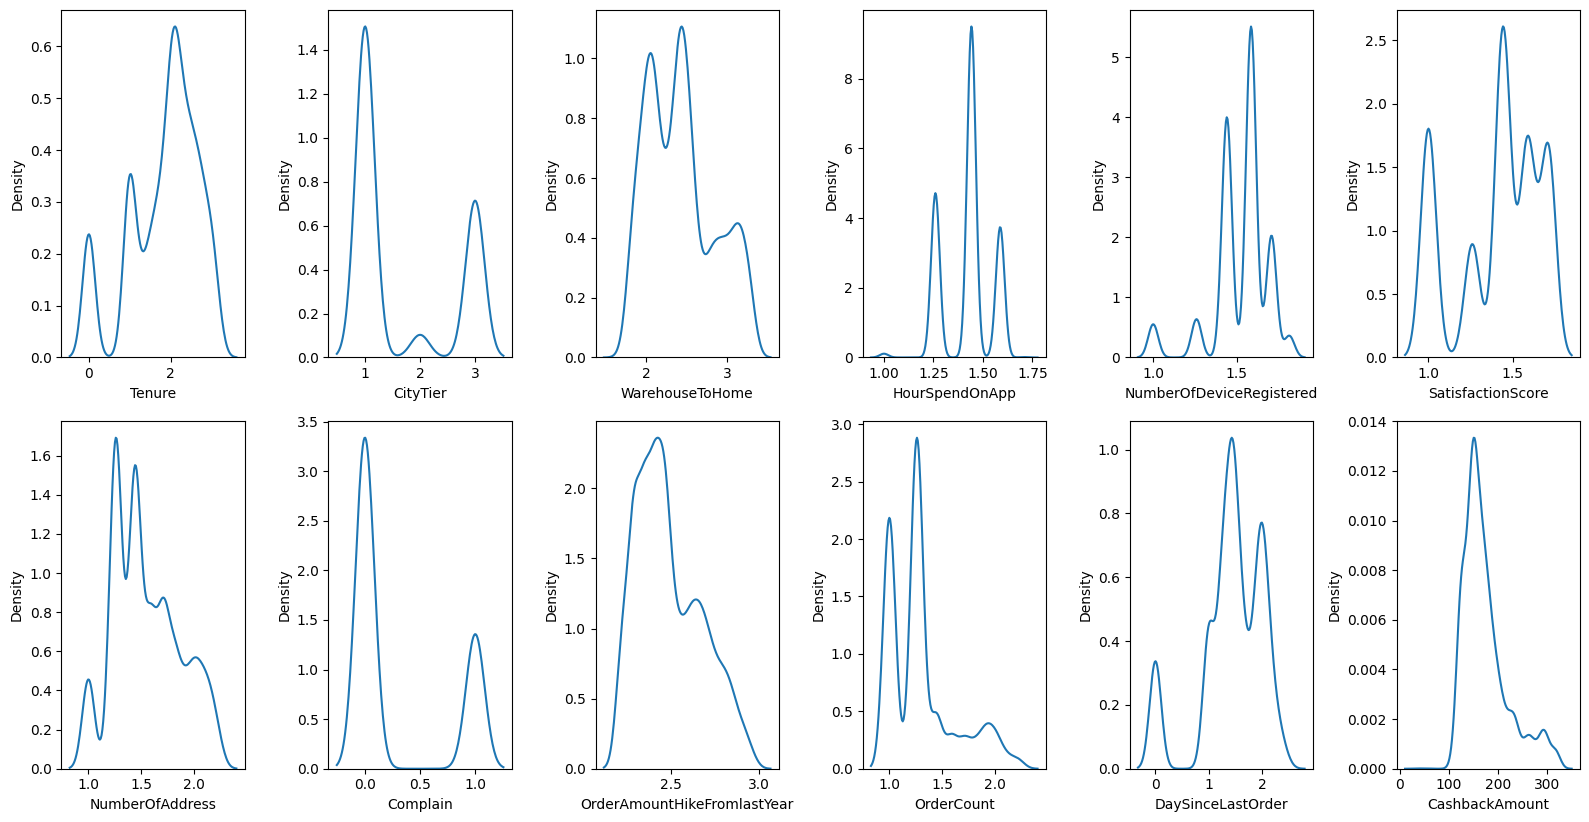

In [140]:
X_train_cbrt = X_train.copy()
for col in log_col:
    X_train_cbrt[col] = np.cbrt(X_train_cbrt[col])
    
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_cbrt[num[i]])
    plt.tight_layout()

## conclusion for transformation

seperti yang dapat kita lihat, boxcox mentransformasi data kita lebih mendekati normal dibanding yang lainnya, karena itu kita akan memilih boxcox sebagai transformasi kita, sekarang kita akan memakai minmaxscaler(normalization) untuk scaling data kita agar memiliki range value yang sama sehingga dapat digunakan pada model yang menghitung jarak seperti logistic regression atau KNN

In [141]:
for col in log_col:
    X_test_transform.loc[X_test_transform[col] == 0, col] =  X_test_transform.loc[X_test_transform[col] != 0][col].min()/2
    
for col in log_col:
    X_test_transform[col] = stats.boxcox(X_test_transform[col])[0]

In [142]:
X_train_transform.describe()

Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  4329.000000  4329.000000      4329.000000     4329.000000   
mean      2.895770     1.658813         1.947806        1.825870   
std       2.153357     0.916206         0.270182        0.639457   
min      -0.614033     1.000000         1.343560        0.000000   
25%       0.786457     1.000000         1.722127        0.967105   
50%       3.336662     1.000000         1.974628        1.891096   
75%       4.564650     3.000000         2.160435        1.891096   
max       6.743981     3.000000         2.435052        3.665713   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               4329.000000        4329.000000      4329.000000   
mean                   3.670347           1.866724         1.287738   
std                    1.581298           1.226606         0.645438   
min                    0.000000           0.000000         0.000000   
25%                    2.537616           0.956375         0.702835   
50%                    4.102731           1.856200         1.123082   
75%                    4.102731           2.721162         1.857456   
max                    7.656851           3.561092         2.516526   

          Complain  OrderAmountHikeFromlastYear   OrderCount  \
count  4329.000000                  4329.000000  4329.000000   
mean      0.288981                     0.868042     0.519266   
std       0.453342                     0.010796     0.414050   
min       0.000000                     0.849106     0.000000   
25%       0.000000                     0.860245     0.000000   
50%       0.000000                     0.868298     0.575703   
75%       1.000000                     0.876894     0.823202   
max       1.000000                     0.889798     1.327737   

       DaySinceLastOrder  CashbackAmount  
count        4329.000000     4329.000000  
mean            1.429188      174.665161  
std             1.175618       46.416563  
min            -0.634078       37.000000  
25%             0.759787      145.340000  
50%             1.272270      161.920000  
75%             2.535338      191.520000  
max             3.936375      324.430000

## Feature encoding

In [143]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [144]:
X_train_transform[cat].describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  4329                 4329   4329                4329   
unique                    2                    5      2                   6   
top                   Phone           Debit Card   Male  Laptop & Accessory   
freq                   3070                 1766   2633                1620   

       MaritalStatus  
count           4329  
unique             3  
top          Married  
freq            2291

PreferedLoginDevice dan Gender akan menggunakan labelEncoder karena hanya memiliki tepat 2 unique value, sedangkan yang lainnya akan memakai OneHotEncoder

In [145]:
X_train_transform['PreferredLoginDevice'].value_counts()

Phone       3070
Computer    1259
Name: PreferredLoginDevice, dtype: int64

In [146]:
X_train_transform['Gender'].value_counts()

Male      2633
Female    1696
Name: Gender, dtype: int64

In [147]:
mappingPLD = {
    'Phone' : 0,
    'Computer' : 1
}

mappingGender = {
    'Male' : 0,
    'Female' : 1
}

X_train_transform['PreferredLoginDevice'] = X_train_transform['PreferredLoginDevice'].map(mappingPLD)
X_train_transform['Gender'] = X_train_transform['Gender'].map(mappingGender)

X_test_transform['PreferredLoginDevice'] = X_test_transform['PreferredLoginDevice'].map(mappingPLD)
X_test_transform['Gender'] = X_test_transform['Gender'].map(mappingGender)

In [148]:
X_train_transform[['PreferredLoginDevice','Gender']].describe()

PreferredLoginDevice       Gender
count           4329.000000  4329.000000
mean               0.290829     0.391776
std                0.454197     0.488204
min                0.000000     0.000000
25%                0.000000     0.000000
50%                0.000000     0.000000
75%                1.000000     1.000000
max                1.000000     1.000000

In [149]:
X_test_transform[['PreferredLoginDevice','Gender']].describe()

PreferredLoginDevice       Gender
count           1078.000000  1078.000000
mean               0.285714     0.426716
std                0.451964     0.494830
min                0.000000     0.000000
25%                0.000000     0.000000
50%                0.000000     0.000000
75%                1.000000     1.000000
max                1.000000     1.000000

In [150]:
X_train_transform = pd.get_dummies(X_train_transform)
X_test_transform = pd.get_dummies(X_test_transform)

In [151]:
X_train_transform.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

## Normalization (MinMaxScaler)

In [152]:
X_train_norm = X_train_transform.copy()
X_test_norm = X_test_transform.copy()

for i in X_train_transform.columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

In [153]:
X_train_norm

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
4478  0.083451                   0.0       0.0         0.500134     1.0   
3685  0.749564                   0.0       0.0         0.541002     1.0   
731   0.000000                   0.0       0.0         0.346835     0.0   
291   0.536924                   1.0       0.0         0.281064     0.0   
184   0.327233                   0.0       0.0         0.454840     0.0   
...        ...                   ...       ...              ...     ...   
3772  0.083451                   0.0       0.0         0.881135     0.0   
5191  0.568900                   0.0       1.0         0.643553     0.0   
5226  0.465338                   0.0       0.0         0.454840     1.0   
5390  0.083451                   0.0       0.0         1.000000     0.0   
860   0.000000                   0.0       0.0         0.896602     0.0   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
4478        0.515888                  0.535825           0.764137   
3685        0.760605                  0.759556           0.521245   
731         0.515888                  0.535825           0.521245   
291         0.263824                  0.331418           0.268562   
184         0.263824                  0.331418           0.268562   
...              ...                       ...                ...   
3772        0.760605                  0.535825           0.521245   
5191        0.515888                  0.535825           0.000000   
5226        0.515888                  0.759556           0.764137   
5390        0.760605                  0.535825           1.000000   
860         0.515888                  0.331418           0.521245   

      NumberOfAddress  Complain  ...  PreferredPaymentMode_UPI  \
4478         0.446283       1.0  ...                       0.0   
3685         0.446283       1.0  ...                       0.0   
731          0.279288       0.0  ...                       0.0   
291          0.279288       1.0  ...                       0.0   
184          0.000000       1.0  ...                       0.0   
...               ...       ...  ...                       ...   
3772         0.279288       0.0  ...                       0.0   
5191         0.738103       0.0  ...                       0.0   
5226         0.958397       0.0  ...                       0.0   
5390         0.446283       0.0  ...                       0.0   
860          0.279288       1.0  ...                       0.0   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
4478                       0.0                       0.0   
3685                       0.0                       0.0   
731                        0.0                       0.0   
291                        0.0                       0.0   
184                        0.0                       0.0   
...                        ...                       ...   
3772                       0.0                       0.0   
5191                       1.0                       0.0   
5226                       0.0                       0.0   
5390                       0.0                       0.0   
860                        0.0                       0.0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
4478                                  0.0                      0.0   
3685                                  1.0                      0.0   
731                                   0.0                      1.0   
291                                   0.0                      0.0   
184                                   0.0                      0.0   
...                                   ...                      ...   
3772                                  1.0                      0.0   
5191                                  0.0                      0.0   
5226                                  0.0                      0.0   
5390                                  0.0                      0

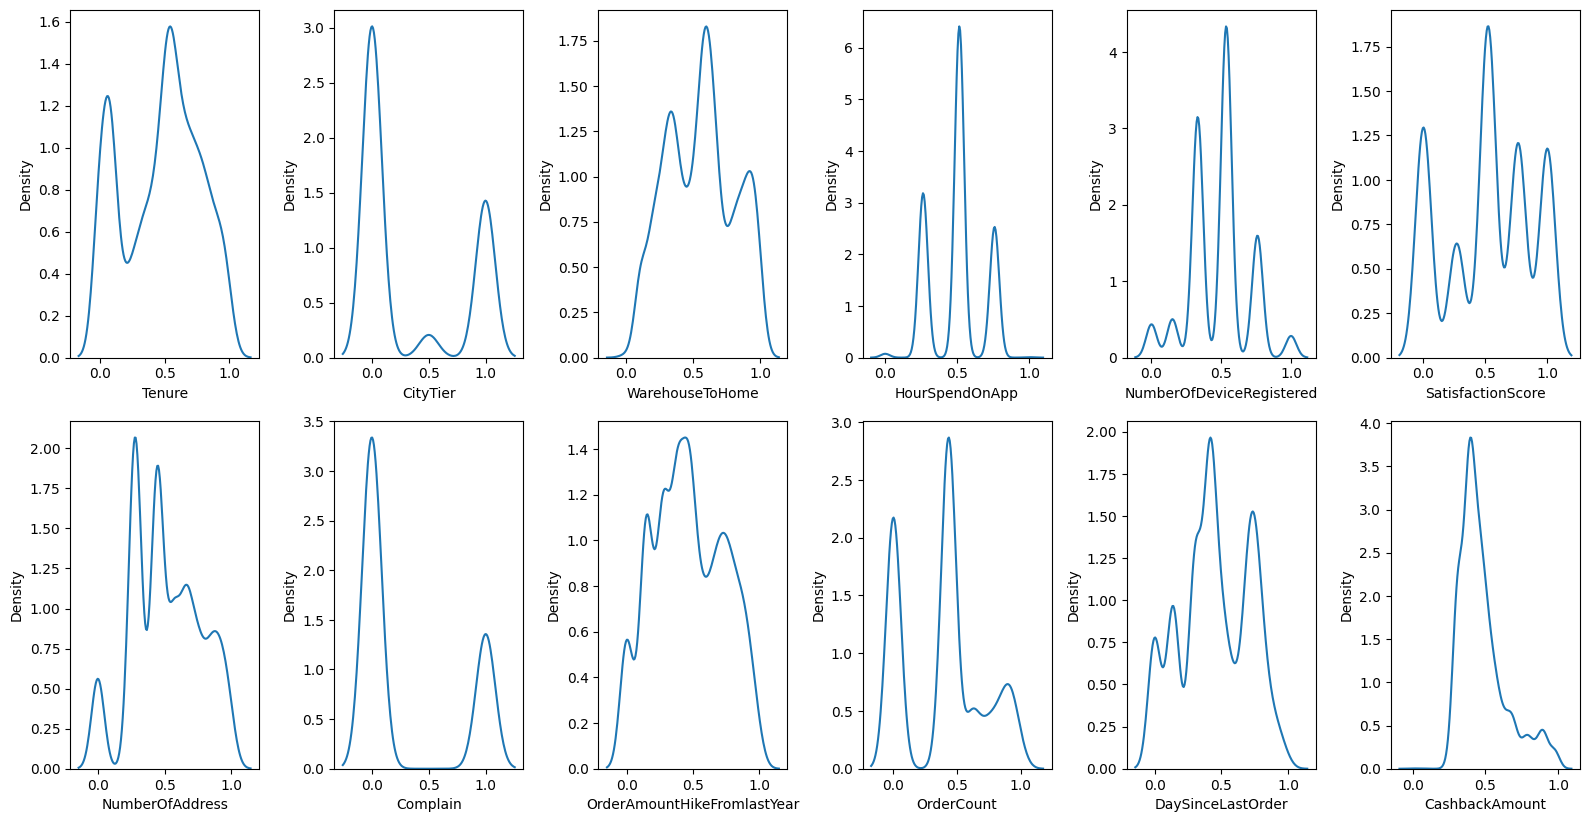

In [154]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_norm[num[i]])
    plt.tight_layout()

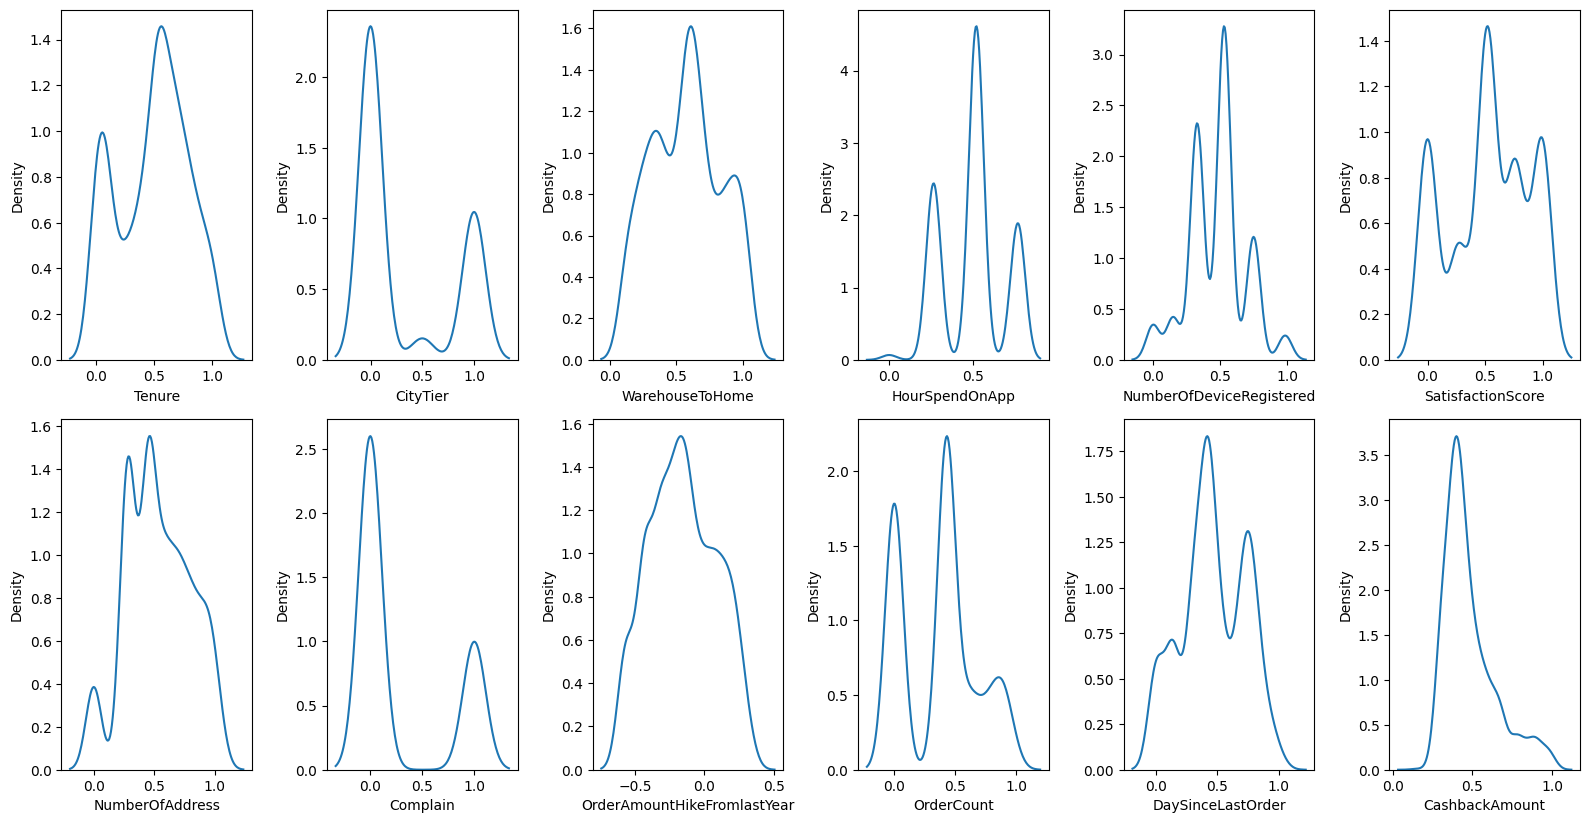

In [155]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_test_norm[num[i]])
    plt.tight_layout()

In [156]:
df_train = X_train_norm.copy()

In [157]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [158]:
df_train['Churn'] = y_train

In [159]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [160]:
df_test = X_test_norm.copy()
df_test['Churn'] = y_test

In [161]:
df_train.to_csv('df_train_2.csv', index = False)
df_test.to_csv('df_test_2.csv', index = False)

# Modeling

In [164]:
import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings
warnings.filterwarnings('ignore')

## Evaluation Metrics

Pada kasus Ecommerce churn prediction ini, kami menggunakan **Recall** sebagai metrics utama karena tujuan utama dari prediksi model ini adalah mencegah customer untuk churn jika ia terdeteksi churn, maka dari itu dengan metrics recall prediksi kami dapat berfokus sebanyak-banyaknya customer yang berpotensi untuk churn untuk mencegah mereka untuk churn.

Customer yang diprediksi akan churn akan diberikan kupon atau penawaran spesial agar mereka tidak churn, namun karena dataset ini mempunyai target yang imbalance, untuk mencegah memberikan terlalu banyak kupon kepada customer yang tidak berpotensi churn maka kami akan memakai metrics **ROC_AUC** sebagai tambahan.

In [165]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Test project

06/03/2022  17:23    <DIR>          .
06/03/2022  17:23    <DIR>          ..
14/02/2022  00:27                66 .gitattributes
06/03/2022  17:12    <DIR>          .ipynb_checkpoints
06/03/2022  17:12    <DIR>          catboost_info
17/02/2022  17:18            95.545 df_test.csv
06/03/2022  17:22           279.065 df_test_2.csv
17/02/2022  17:18           365.331 df_train.csv
06/03/2022  17:22         1.079.863 df_train_2.csv
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
06/03/2022  17:23         4.904.768 Full notebook - Copy.ipynb
06/03/2022  17:02         3.979.665 Full notebook.ipynb
06/03/2022  17:12    <DIR>          Guidance
06/03/2022  17:23           167.782 heatmap.png
05/03/2022  14:21           208.179 Insight.ipynb
05/03/2022  17:54         7.855.042 Intellegend Final Project Presentation.pdf
05/03/2022  17:58        12.075.5

In [166]:
df_train = pd.read_csv('df_train_2.csv')
df_test = pd.read_csv('df_test_2.csv')

In [167]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [168]:
df_train.head()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0  0.083451                   0.0       0.0         0.500134     1.0   
1  0.749564                   0.0       0.0         0.541002     1.0   
2  0.000000                   0.0       0.0         0.346835     0.0   
3  0.536924                   1.0       0.0         0.281064     0.0   
4  0.327233                   0.0       0.0         0.454840     0.0   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0        0.515888                  0.535825           0.764137   
1        0.760605                  0.759556           0.521245   
2        0.515888                  0.535825           0.521245   
3        0.263824                  0.331418           0.268562   
4        0.263824                  0.331418           0.268562   

   NumberOfAddress  Complain  ...  PreferedOrderCat_Fashion  \
0         0.446283       1.0  ...                       0.0   
1         0.446283       1.0  ...                       0.0   
2         0.279288       0.0  ...                       0.0   
3         0.279288       1.0  ...                       0.0   
4         0.000000       1.0  ...                       0.0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                       0.0                                  0.0   
1                       0.0                                  1.0   
2                       0.0                                  0.0   
3                       0.0                                  0.0   
4                       0.0                                  0.0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                      0.0                            1.0   
1                      0.0                            0.0   
2                      1.0                            0.0   
3                      0.0                            1.0   
4                      0.0                            1.0   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                      0.0                     0.0                    0.0   
1                      0.0                     0.0                    0.0   
2                      0.0                     0.0                    0.0   
3                      0.0                     1.0                    0.0   
4                      0.0                     1.0                    0.0   

   MaritalStatus_Single  Churn  
0                   1.0      0  
1                   1.0      0  
2                   1.0      0  
3                   0.0      0  
4                   0.0      0  

[5 rows x 29 columns]

In [169]:
X_train = df_train.drop('Churn', axis = 1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis = 1)
y_test = df_test['Churn']

## Baseline Model

In [170]:
X_train

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     0.083451                   0.0       0.0         0.500134     1.0   
1     0.749564                   0.0       0.0         0.541002     1.0   
2     0.000000                   0.0       0.0         0.346835     0.0   
3     0.536924                   1.0       0.0         0.281064     0.0   
4     0.327233                   0.0       0.0         0.454840     0.0   
...        ...                   ...       ...              ...     ...   
4324  0.083451                   0.0       0.0         0.881135     0.0   
4325  0.568900                   0.0       1.0         0.643553     0.0   
4326  0.465338                   0.0       0.0         0.454840     1.0   
4327  0.083451                   0.0       0.0         1.000000     0.0   
4328  0.000000                   0.0       0.0         0.896602     0.0   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0           0.515888                  0.535825           0.764137   
1           0.760605                  0.759556           0.521245   
2           0.515888                  0.535825           0.521245   
3           0.263824                  0.331418           0.268562   
4           0.263824                  0.331418           0.268562   
...              ...                       ...                ...   
4324        0.760605                  0.535825           0.521245   
4325        0.515888                  0.535825           0.000000   
4326        0.515888                  0.759556           0.764137   
4327        0.760605                  0.535825           1.000000   
4328        0.515888                  0.331418           0.521245   

      NumberOfAddress  Complain  ...  PreferredPaymentMode_UPI  \
0            0.446283       1.0  ...                       0.0   
1            0.446283       1.0  ...                       0.0   
2            0.279288       0.0  ...                       0.0   
3            0.279288       1.0  ...                       0.0   
4            0.000000       1.0  ...                       0.0   
...               ...       ...  ...                       ...   
4324         0.279288       0.0  ...                       0.0   
4325         0.738103       0.0  ...                       0.0   
4326         0.958397       0.0  ...                       0.0   
4327         0.446283       0.0  ...                       0.0   
4328         0.279288       1.0  ...                       0.0   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
4324                       0.0                       0.0   
4325                       1.0                       0.0   
4326                       0.0                       0.0   
4327                       0.0                       0.0   
4328                       0.0                       0.0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                     0.0                      0.0   
1                                     1.0                      0.0   
2                                     0.0                      1.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
...                                   ...                      ...   
4324                                  1.0                      0.0   
4325                                  0.0                      0.0   
4326                                  0.0                      0.0   
4327                                  0.0                      0

In [171]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4324    0
4325    1
4326    0
4327    0
4328    1
Name: Churn, Length: 4329, dtype: int64

In [172]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [173]:
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.810287141073658


In [174]:
LRP = { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    }

In [175]:
LR = LogisticRegression()
GSCV = GridSearchCV(LR, LRP, cv = 5, n_jobs = -1, verbose = 0, scoring = 'recall')
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.8080649188514357


In [176]:
y_pred_train = GSCV.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 0.5624161073825503
ROC_AUC Score = 0.7608397501198465


Jika dilihat dari model baseline, model tersebut adalah model yang undertrain. karena itu kita perlu menaikkan variance dari model dengan menggunakan model-model boosting. Namun model-model lain akan tetap dicoba untuk menguji performa mereka

In [14]:
models = [DecisionTreeClassifier(random_state = 42),
          KNeighborsClassifier(),
          SVC(random_state = 42),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(random_state = 42),
         XGBClassifier(random_state = 42, use_label_encoder=False),
         AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Decision Tree',
         'KNN',
         'SVM',
       'Random Forest',
       'Gradient Boosting',
       'XGBoost',
       'AdaBoost',
       'CatBoost']

## Before Hyperparameter Tuning

In [7]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    print('Test score:')
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print('\n')

In [16]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8764044943820225
ROC_AUC Score = 0.905980024968789


KNN:
Recall Score = 0.6671140939597315
ROC_AUC Score = 0.8230938773370086
Test score:
Recall Score = 0.47191011235955055
ROC_AUC Score = 0.7181772784019975


SVM:
Recall Score = 0.6496644295302013
ROC_AUC Score = 0.8188333308365291
Test score:
Recall Score = 0.6629213483146067
ROC_AUC Score = 0.8247940074906367


Random Forest:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8202247191011236
ROC_AUC Score = 0.907334581772784


Gradient Boosting:
Recall Score = 0.7046979865771812
ROC_AUC Score = 0.8421648415028763
Test score:
Recall Score = 0.6797752808988764
ROC_AUC Score = 0.8287765293383271


XGBoost:
[19:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

## After Hyperparameter Tuning

In [17]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [18]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': list(range(0,10)),
        'min_samples_leaf': list(range(0,10)),
        'max_features': plusNone(np.array(range(1,X_train.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {# SVC
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }, 
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {# Gradient Boosting
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    },
    { # XGBoost
#         'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 5)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 10)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    }
]

In [19]:
def model_score_tune_rscv(model, name, params, n_iter = 10, verbose = 0):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred_train = RSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = RSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [20]:
def model_score_tune_gscv(model, name, params, verbose = 0):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [21]:
def rand_state(model, name, params = {'random_state' : (range(0,1000))}):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [22]:
def rand_state(model, par, n = range(0,1000)):
    recalls = []
    ROC_AUCs = []
    for i in n:
#         model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = i)
        model = model
        for k, v in par.items():
            setattr(model, k, v)
        setattr(model, 'random_state', i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))
        ROC_AUCs.append(roc_auc_score(y_test, y_pred))
    recArr = np.array(recalls)
    rocArr = np.array(ROC_AUCs)
    print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
    print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

In [116]:
rand_state(DecisionTreeClassifier(), {'max_depth': 16.0, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2})

max recall = 0.8932584269662921, rs = 469
max ROC_AUC = 0.9288514357053682, rs = 657


In [118]:
rand_state(RandomForestClassifier(), {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})

max recall = 0.9157303370786517, rs = 26
max ROC_AUC = 0.9561985018726592, rs = 247


In [45]:
for i in range(0,1):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Train score:
Recall Score = 0.9973154362416108
ROC_AUC Score = 0.9986577181208054
Test score:
Recall Score = 0.8932584269662921
ROC_AUC Score = 0.9255181023720348
{'max_depth': 16.0, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}




In [107]:
model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469)
model_score(model, 'Decision Tree')

Decision Tree:
Recall Score = 0.9906040268456375
ROC_AUC Score = 0.9943254509228188
Test score:
Recall Score = 0.8932584269662921
ROC_AUC Score = 0.9260736579275904




In [124]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8314606741573034
ROC_AUC Score = 0.9073970037453184




In [26]:
for i in range(0,3):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 0.0
ROC_AUC Score = 0.5
{'max_depth': 6.0, 'max_features': 8, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004}


KNN:
Recall Score = 0.8426966292134831
ROC_AUC Score = 0.9063483146067415
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


SVM:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.8849937578027466
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}




In [27]:
model_score_tune_gscv(models[3], names[3], params[3])

Random Forest:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.9472159800249688
{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}




In [123]:
model_score(RandomForestClassifier(**{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 26}), 'Random Forest')

Random Forest:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9157303370786517
ROC_AUC Score = 0.9545318352059924




In [28]:
model_score_tune_gscv(models[4], names[4], params[4])

Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 5}




In [41]:
model_score_tune_rscv(models[5], names[5], params[5], 1000, verbose = 1)

XGBoost:
Fitting 2 folds for each of 1000 candidates, totalling 2000 fits
[00:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9360424469413233
{'tree_method': 'auto', 'min_child_weight': 1, 'lambda': 1.0, 'gamma': 0.0, 'eta': 0.8888888888888888, 'colsample_bytree': 1.0, 'alpha': 0.25}




In [81]:
par = {'tree_method': 'auto', 'min_child_weight': 1, 'lambda': 0.1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 1.0, 'alpha': 0.25, 'random_state' : 42, 'use_label_encoder':False, 'scale_pos_weight': 5}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
[00:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9269662921348315
ROC_AUC Score = 0.9484831460674158




In [145]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'use_label_encoder':False, 'scale_pos_weight': 5,  'eval_metric': 'logloss'}
recalls = []
ROC_AUCs = []
for i in range(1000):
    model = XGBClassifier(**par)
    setattr(model, 'random_state', i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))
    ROC_AUCs.append(roc_auc_score(y_test, y_pred))
recArr = np.array(recalls)
rocArr = np.array(ROC_AUCs)
print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

max recall = 0.9550561797752809, rs = 322
max ROC_AUC = 0.9613857677902623, rs = 830


In [146]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9550561797752809
ROC_AUC Score = 0.9597503121098626




In [129]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8314606741573034
ROC_AUC Score = 0.9073970037453184




In [150]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42, learning_rate = 0.01, n_estimators = 20, algorithm = 'SAMME')
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.9466604244694132




In [153]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME'
}

In [152]:
rand_state(AdaBoostClassifier(), par)

max recall = 0.9269662921348315, rs = 433
max ROC_AUC = 0.9562297128589264, rs = 476


In [154]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME',
    'random_state' : 433
}

In [155]:
model_score(AdaBoostClassifier(**par), 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9269662921348315
ROC_AUC Score = 0.9395942571785268




In [70]:
for i in range(7,len(models)):
    model_score_tune_gscv(models[i], names[i], params[i])

CatBoost:
Train score:
Recall Score = 0.8536912751677852
ROC_AUC Score = 0.9239159500838926
Test score:
Recall Score = 0.7640449438202247
ROC_AUC Score = 0.8698002496878902
{'max_depth': 5, 'n_estimators': 100}




## Model Score

**Decision Tree:**
- Recall Score = 0.8932584269662921
- ROC_AUC Score = 0.9255181023720348

**KNN:**
- Recall Score = 0.8426966292134831
- ROC_AUC Score = 0.9063483146067415

**SVM:**
- Recall Score = 0.898876404494382
- ROC_AUC Score = 0.8849937578027466

**Random Forest:**
- Recall Score = 0.9157303370786517
- ROC_AUC Score = 0.9545318352059924

**Gradient Boosting:**
- Recall Score = 1.0
- ROC_AUC Score = 0.5

**XGBoost:**
- Recall Score = 0.9550561797752809
- ROC_AUC Score = 0.9597503121098626

**AdaBoost:**
- Recall Score = 0.9269662921348315
- ROC_AUC Score = 0.9395942571785268

**CatBoost:**
- Recall Score = 0.7640449438202247
- ROC_AUC Score = 0.8698002496878902

Dari model score diatas dapat disimpulkan bahwa XGBoost memiliki performa yang paling baik

## Feature Importance

In [177]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [201]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    print(f'Precision Score = {precision_score(y_train, y_pred_train)}')
    print('Test score:')
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(f'Precision Score = {precision_score(y_test, y_pred)}')
    print('\n')

In [202]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Precision Score = 1.0
Test score:
Recall Score = 0.9550561797752809
ROC_AUC Score = 0.9597503121098626
Precision Score = 0.8415841584158416




In [181]:
y_test.value_counts()

0    900
1    178
Name: Churn, dtype: int64

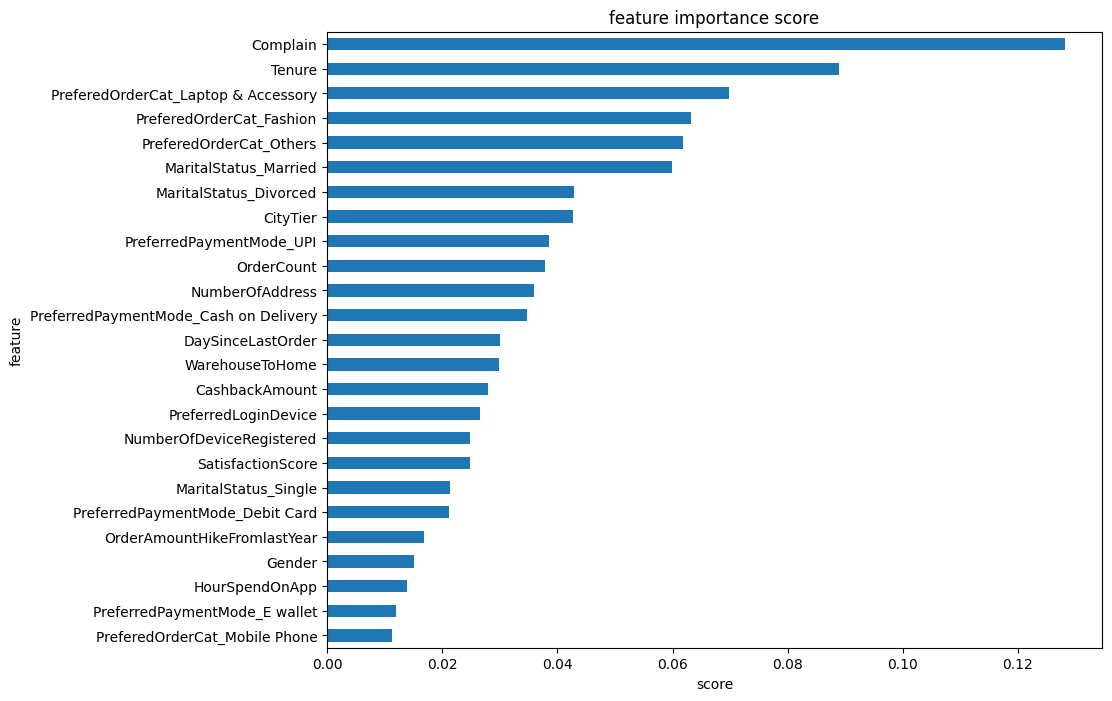

In [182]:
show_feature_importance(model)

## Shap Values

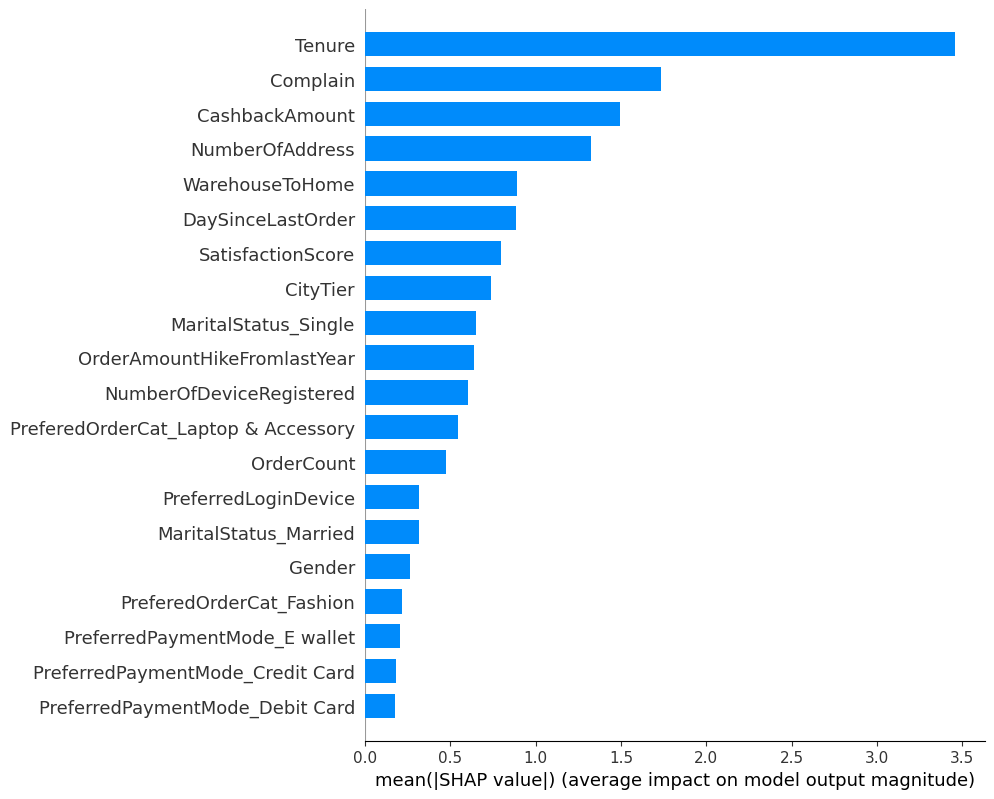

In [183]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.summary_plot(shap_values.values, X_train, plot_type="bar")

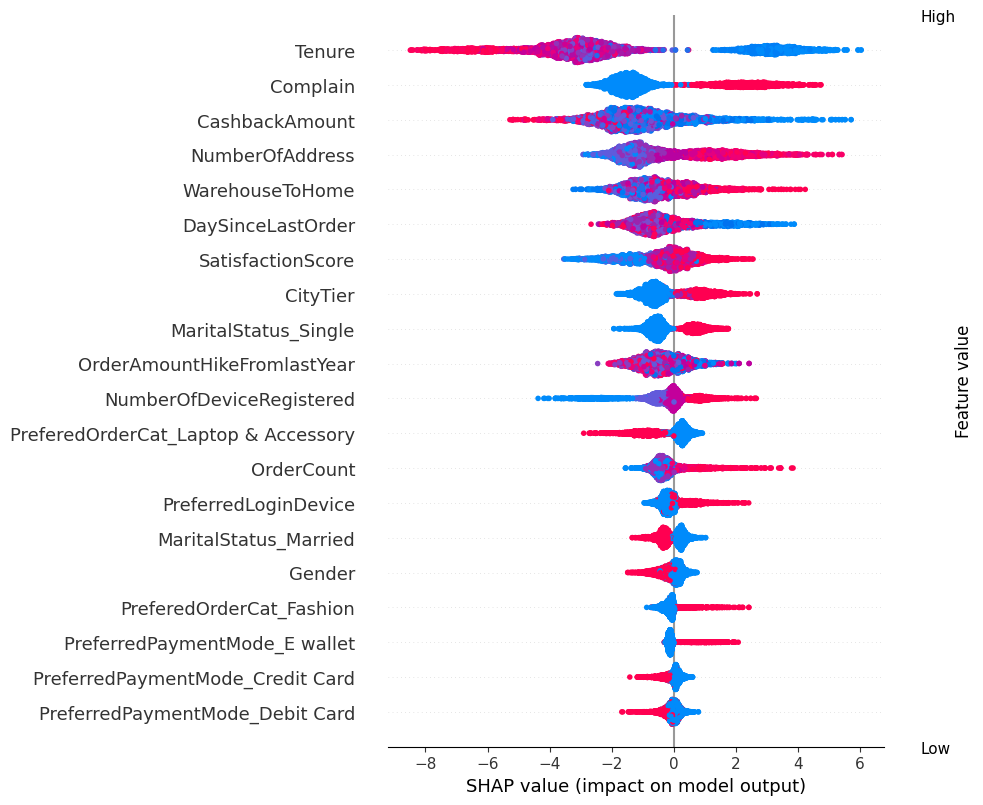

In [184]:
f = plt.figure(figsize = (12,8))
shap.summary_plot(shap_values, X_train, show = False)
plt.gcf().axes[-1].set_aspect(1000)

Feature yang mempunyai pengaruh besar adalah:
- Complain
- Tenure
- PreferedOrderCat
- MaritalStatus
- CashbackAmount
- WarehouseToHome
- DaySinceLastOrder
- NumberOfAddress
- OrderAmountHikeFromlastYear
- SatisfactionScore
- NumberOfDeviceRegistered
- OrderCount
- CityTier
- MaritalStatus_Single
- PreferredLoginDevice
- PreferredPaymentMode

Melihat dari feature-feature yang penting diatas dapat ditarik kesimpulan bahwa, untuk mencegah terjadinya customer churn, pelanggan butuh diberikan Cashback 1.6x lebih besar sampai setidaknya 2 bulan (2 bulan disini merupakan insight yang didapat dari EDA). Hal ini dapat kita tarik sebagai kesimpulan karena terlihat CashbackAmount dan Tenure merupakan feature yang paling berpengaruh pada churn customer. Selain itu Complain dari customer juga memiliki dampak besar, jika customer memiliki complain harus diselesaikan dengan segera, karena complain yang tidak diselesaikan dapat menyebabkan customer churn dan menurunkan SatisfactionScore yang juga berdampak pada meningkatnya kecenderungan customer untuk churn.

Selain itu jumlah warehouse juga perlu diperbanyak di tempat yang memiliki banyak customer, karena warehouse yang terlalu jauh menyebabkan customer churn. Pihak Ecommerce juga harus menjaga DaySinceLastOrder tetap stabil, jika customer terlalu sering atau terlalu jarang menggunakan Ecommerce ini, maka customer tersebut akan berpotensi churn karena itulah customer perlu diberikan voucher mingguan yang membuat belanja mereka teratur setiap minggunya. Pembagian voucher ini juga dapat menaikkan OrderAmountHikeFromlastYear yang dapat mencegah terjadinya churn.

NumberOfAddress dan NumberOfDeviceRegistered yang tinggi terlihat berpotensi menyebabkan customer untuk churn, karena itulah sebaiknya dibatasi menjadi maksimal 3. Gender, CityTier, dan MaritalStatus dari customer pun cukup berpengaruh, sebaiknya pihak Ecommerce menargetkan customer perempuan yang sudah menikah dan berasal dari CityTier yang rendah (1), karena merekalah customer yang memiliki tingkat kemungkinan churn lebih kecil. Untuk metode pembayaran juga memiliki pengaruh, baiknya pihak Ecommerce menargetkan pengguna credit card dan debit card, hal ini bisa dilakukan dengan memberikan penawaran spesial untuk customer yang membayar menggunakan metode ini.

## Feature Selection

In [185]:
to_drop = ['OrderAmountHikeFromlastYear', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_Credit Card']

In [186]:
X_train_selection = X_train.drop(to_drop, axis=1)
X_test_selection = X_test.drop(to_drop, axis=1)

### Dengan hyperparameter sebelumnya

In [203]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model.fit(X_train_selection, y_train )
y_pred_train = model.predict(X_train_selection)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
print(f'Precision Score = {precision_score(y_train, y_pred_train)}')
print('Test score:')
ypred = model.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')
print(f'Precision Score = {precision_score(y_test, ypred)}')

Recall Score = 1.0
ROC_AUC Score = 1.0
Precision Score = 1.0
Test score:
Recall Score = 0.9662921348314607
ROC_AUC Score = 0.9792571785268415
Precision Score = 0.9608938547486033


Beberapa feature yang di drop adalah feature yang redundant dan berpotensi mengakibatkan multicolinearity. Karena pada saat One-Hot encoding baiknya kolom terakhir di drop. Dengan melakukan feature selection dapat terlihat bahwa score dari model menjadi naik

# Insight

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [206]:
df.shape

(5630, 20)

## Feature Engineering

### Total Pembelian

Dengan asumsi cashback adalah 2% dari total pembelian

In [207]:
df['Total Pembelian'] = df['CashbackAmount'] * 50 * df['OrderCount']

In [208]:
df[['Total Pembelian', 'CashbackAmount']]

Total Pembelian  CashbackAmount
0              7996.5          159.93
1              6045.0          120.90
2              6014.0          120.28
3              6703.5          134.07
4              6480.0          129.60
...               ...             ...
5625          15071.0          150.71
5626          22491.0          224.91
5627          18642.0          186.42
5628          17890.0          178.90
5629          16904.0          169.04

[5630 rows x 2 columns]

In [209]:
df['Total Pembelian'].sum()

154339328.5

In [210]:
154339328 / df.shape[0] * 0.03

822.4120497335701

### Potensi Kerugian

In [211]:
df[df['Churn'] == 1]['Total Pembelian'].sum()

23134478.0

In [212]:
(6/16.83 ) * 23134478

8247585.739750447

### Potensi Profit

In [213]:
23134478 - 8247585

14886893

## Business Insight

In [214]:
def cr(vc):
    return vc[1] / (vc[0] + vc[1]) * 100

### CashbackAmount

#### Churn rate customer dengan cashback dibawah 240

In [215]:
cr(df[df['CashbackAmount'] < 240]['Churn'].value_counts())

18.431135309538213

#### Churn rate customer dengan cashback minimal 240

In [216]:
cr(df[df['CashbackAmount'] >= 240]['Churn'].value_counts())

5.067064083457526

#### Churn rate customer dengan cashback minimal 270

In [217]:
cr(df[df['CashbackAmount'] >= 270]['Churn'].value_counts())

4.464285714285714

In [218]:
df['Churn'].value_counts()[1]

948

In [219]:
cr(df[df['CashbackAmount'] < 240]['Churn'].value_counts())

18.431135309538213

In [220]:
(df[df['CashbackAmount'] < 240]['Churn'].value_counts()[1] / df['Churn'].value_counts()[1]) * 100

96.41350210970464

Karena menaikkan cashback ke 270 tidak menurunkan churn rate secara signifikan, maka cashback terbaik adalah 240

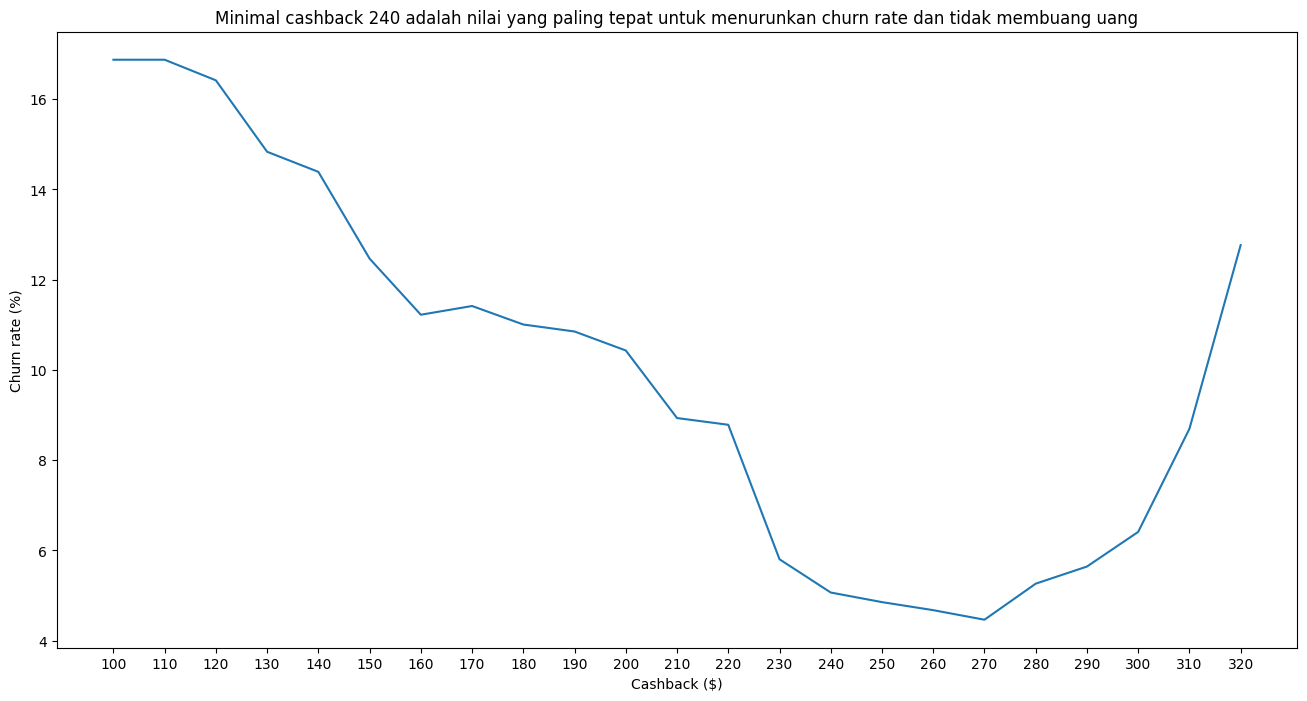

In [221]:
cashback = [i for i in range(100, 330, 10)]
churn_rate = []

for i in cashback:
    val_counts = df[df['CashbackAmount'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (16,8))
ax = sns.lineplot(x = cashback, y = churn_rate)
ax.set_xticks(cashback);
ax.set_ylabel('Churn rate (%)')
ax.set_xlabel('Cashback ($)');
ax.set_title('Minimal cashback 240 adalah nilai yang paling tepat untuk menurunkan churn rate dan tidak membuang uang');

### Persentase customer dengan cashback minimal 240

In [222]:
(df[df['CashbackAmount'] >= 240]['Churn'].shape[0] / df.shape[0]) * 100

11.918294849023091

## Tenure

### Churn rate customer dengan tenure 0 bulan

In [223]:
cr(df[df['Tenure'] == 0]['Churn'].value_counts())

53.54330708661418

### Churn rate customer dengan tenure lebih kecil dari 2 bulan

In [224]:
cr(df[df['Tenure'] < 2]['Churn'].value_counts())

51.83639398998331

### Churn rate customer dengan tenure minimal 2 bulan

In [225]:
cr(df[df['Tenure'] >= 2]['Churn'].value_counts())

5.902111324376199

### Total churn customer dengan tenure dibawah 2 bulan dibanding total churn customer

In [226]:
(df[df['Tenure'] < 2]['Churn'].value_counts()[1] / df['Churn'].value_counts()[1]) * 100

65.50632911392405

65.5% customer yang churn berasal dari customer yang memiliki tenure dibawah 2 bulan

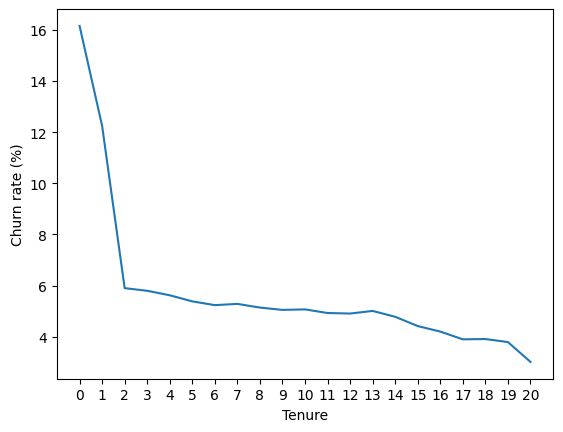

In [227]:
tenure = [i for i in range(21)]
churn_rate = []

for i in tenure:
    val_counts = df[df['Tenure'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

ax = sns.lineplot(x = tenure, y = churn_rate)
ax.set_xticks(tenure);
ax.set_ylabel('Churn rate (%)')
ax.set_xlabel('Tenure');

Dapat terlihat bahwa setelah 2 bulan penurunan churn rate sudah tidak signifikan

### Persentase customer dengan tenure minimal 2 bulan

In [228]:
(df[df['Tenure'] >= 2]['Churn'].shape[0] / df.shape[0]) * 100

74.03197158081704

## Jumlah Alamat dan Jumlah Device

In [229]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Pembelian'],
      dtype='object')

In [230]:
cr(df[(df['NumberOfDeviceRegistered'] <= 3) & (df['NumberOfAddress'] <= 3)]['Churn'].value_counts())

13.768115942028986

In [231]:
cr(df[(df['NumberOfDeviceRegistered'] > 3) & (df['NumberOfAddress'] > 3)]['Churn'].value_counts())

18.43065693430657

In [232]:
df[df['NumberOfAddress'] > 4].shape

(2024, 21)

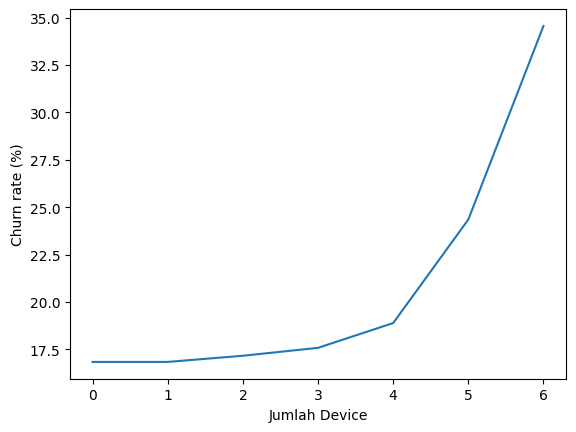

In [233]:
jumlah_device = [i for i in range(7)]
churn_rate = []

for i in jumlah_device:
    val_counts = df[df['NumberOfDeviceRegistered'] >= i]['Churn'].value_counts()
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

ax = sns.lineplot(x = jumlah_device, y = churn_rate)
ax.set_xticks(jumlah_device);
ax.set_ylabel('Churn rate (%)')
ax.set_xlabel('Jumlah Device');

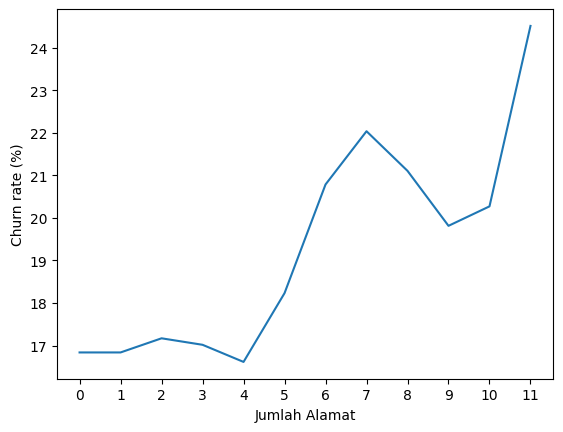

In [234]:
jumlah_alamat = [i for i in range(12)]
churn_rate = []

for i in jumlah_alamat:
    val_counts = df[df['NumberOfAddress'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

ax = sns.lineplot(x = jumlah_alamat, y = churn_rate)
ax.set_xticks(jumlah_alamat);
ax.set_ylabel('Churn rate (%)')
ax.set_xlabel('Jumlah Alamat');

In [235]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Pembelian'],
      dtype='object')

## DaySinceLastOrder

In [236]:
df['DaySinceLastOrder'].describe()

count    5323.000000
mean        4.543491
std         3.654433
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

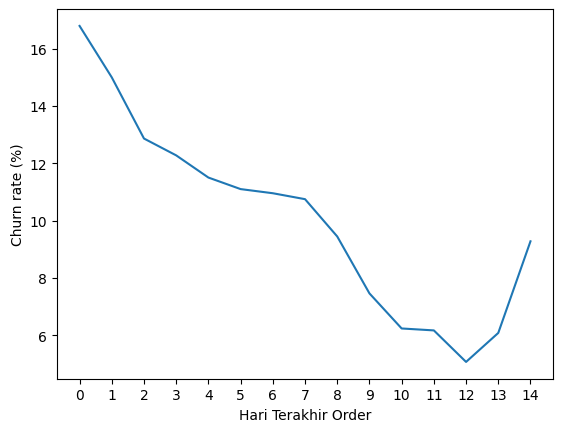

In [237]:
recency = [i for i in range(15)]
churn_rate = []

for i in recency:
    val_counts = df[df['DaySinceLastOrder'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

ax = sns.lineplot(x = recency, y = churn_rate)
ax.set_xticks(recency);
ax.set_ylabel('Churn rate (%)')
ax.set_xlabel('Hari Terakhir Order');

In [238]:
df[df['Churn'] == 0].describe()

CustomerID   Churn       Tenure     CityTier  WarehouseToHome  \
count   4682.000000  4682.0  4499.000000  4682.000000      4515.000000   
mean   52829.455575     0.0    11.502334     1.619821        15.353931   
std     1622.742772     0.0     8.419217     0.902332         8.483276   
min    50027.000000     0.0     0.000000     1.000000         5.000000   
25%    51422.250000     0.0     5.000000     1.000000         9.000000   
50%    52828.500000     0.0    10.000000     1.000000        13.000000   
75%    54236.750000     0.0    17.000000     3.000000        19.000000   
max    55630.000000     0.0    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     4485.000000               4682.000000        4682.000000   
mean         2.925530                  3.639257           3.001282   
std          0.727184                  1.018910           1.378722   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      4682.000000  4682.000000                  4431.000000  4434.000000   
mean          4.162965     0.234088                    15.724893     1.758232   
std           2.537001     0.423473                     3.646256     1.893083   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           5.000000     0.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  Total Pembelian  
count  4442.000000        4429.000000     4682.000000      4442.000000  
mean      3.046601           4.807406      180.635203     29537.336898  
std       2.964982           3.644758       50.434791     36652.818677  
min       1.000000           0.000000        0.000000         0.000000  
25%       1.000000           2.000000      147.240000      8435.875000  
50%       2.000000           4.000000      166.115000     16698.000000  
75%       3.000000           8.000000      201.250000     30682.500000  
max      16.000000          31.000000      324.990000    256296.000000

In [239]:
df[df['DaySinceLastOrder'] >= 12].shape

(217, 21)

In [240]:
df[df['DaySinceLastOrder'] >= 9].shape

(764, 21)

In [241]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Pembelian'],
      dtype='object')

In [242]:
df['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

## Simulasi Cashback

In [243]:
1.8 / 3

0.6

In [244]:
df[df['Tenure'] == 0]

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
5          50006      1     0.0             Computer         1   
12         50013      1     0.0                Phone         1   
13         50014      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
2778       52779      0     0.0                Phone         3   
2781       52782      0     0.0                Phone         3   
2787       52788      1     0.0                Phone         1   
2809       52810      0     0.0                Phone         3   
2812       52813      0     0.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
5                22.0           Debit Card  Female             3.0   
12               11.0                  COD    Male             2.0   
13               15.0                   CC    Male             3.0   
...               ...                  ...     ...             ...   
2778             14.0                  UPI  Female             2.0   
2781              NaN                   CC    Male             2.0   
2787              7.0          Credit Card    Male             2.0   
2809             11.0                  UPI  Female             NaN   
2812             10.0           Debit Card    Male             2.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
3                            4  ...                 5         Single   
4                            3  ...                 5         Single   
5                            5  ...                 5         Single   
12                           3  ...                 3         Single   
13                           4  ...                 3       Divorced   
...                        ...  ...               ...            ...   
2778                         3  ...                 3        Married   
2781                         3  ...                 5         Single   
2787                         3  ...                 1        Married   
2809                         4  ...                 3         Single   
2812                         1  ...                 4        Married   

     NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
3                  8         0                         23.0         0.0   
4                  3         0                         11.0         1.0   
5                  2         1                         22.0         4.0   
12                 2         1                         13.0         2.0   
13                 1         1                         17.0         0.0   
...              ...       ...                          ...         ...   
2778               1         1                         22.0         0.0   
2781               2         1                         11.0         1.0   
2787              10         1                         14.0         2.0   
2809               1         0                         18.0         1.0   
2812               2         1                         20.0         0.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  Total Pembelian  
3            1.0                3.0          134.07           6703.5  
4            1.0                3.0          129.60           6480.0  
5            6.0                7.0          139.19          41757.0  
12           2.0                2.0          134.41          13441.0  
13           1.0                0.0          133.88           6694.0  
...          ...                ...             ...              ...  
2778         1.0                4.0          149.07           7453.5  
2781         1.0                2.0   

In [245]:
df[df['Tenure'] == 1]

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
37         50038      0     1.0                Phone         1   
79         50080      1     1.0         Mobile Phone         1   
164        50165      0     1.0                Phone         1   
177        50178      0     1.0         Mobile Phone         1   
249        50250      0     1.0         Mobile Phone         3   
...          ...    ...     ...                  ...       ...   
5596       55597      0     1.0                Phone         3   
5598       55599      1     1.0             Computer         3   
5602       55603      1     1.0         Mobile Phone         1   
5624       55625      0     1.0         Mobile Phone         3   
5627       55628      0     1.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
37               27.0                   CC    Male             NaN   
79               35.0          Credit Card    Male             3.0   
164              14.0           Debit Card  Female             3.0   
177              22.0          Credit Card    Male             3.0   
249              15.0           Debit Card    Male             3.0   
...               ...                  ...     ...             ...   
5596             12.0          Credit Card    Male             3.0   
5598             16.0             E wallet    Male             3.0   
5602              8.0          Credit Card    Male             3.0   
5624             12.0                  UPI  Female             2.0   
5627             11.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
37                           3  ...                 2       Divorced   
79                           3  ...                 5       Divorced   
164                          3  ...                 2         Single   
177                          2  ...                 5         Single   
249                          3  ...                 2         Single   
...                        ...  ...               ...            ...   
5596                         4  ...                 5         Single   
5598                         4  ...                 5        Married   
5602                         4  ...                 1        Married   
5624                         5  ...                 3         Single   
5627                         2  ...                 4        Married   

     NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
37                 2         0                         11.0         0.0   
79                 8         1                         19.0         0.0   
164                2         0                         21.0         0.0   
177                1         0                         19.0         0.0   
249                2         0                         16.0         1.0   
...              ...       ...                          ...         ...   
5596               3         1                         12.0         2.0   
5598               3         0                         20.0         2.0   
5602              11         1                         15.0         3.0   
5624               2         0                         19.0         2.0   
5627               3         1                         21.0         1.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  Total Pembelian  
37           1.0                2.0          127.13           6356.5  
79           1.0                0.0          166.73           8336.5  
164          1.0                2.0          133.10           6655.0  
177          1.0                7.0          156.61           7830.5  
249          1.0                7.0          152.53           7626.5  
...          ...                ...             ...              ...  
5596         2.0                3.0          148.80          14880.0  
5598         2.0                1.0   

In [246]:
df[df['Tenure'] > 2]

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
8          50009      1    13.0                Phone         3   
10         50011      1     4.0         Mobile Phone         1   
11         50012      1    11.0         Mobile Phone         1   
14         50015      1     9.0         Mobile Phone         3   
...          ...    ...     ...                  ...       ...   
5623       55624      0     5.0             Computer         1   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
8                 9.0             E wallet    Male             NaN   
10               18.0     Cash on Delivery  Female             2.0   
11                6.0           Debit Card    Male             3.0   
14               15.0          Credit Card    Male             3.0   
...               ...                  ...     ...             ...   
5623             12.0          Credit Card    Male             4.0   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
0                            3  ...                 2         Single   
8                            4  ...                 3       Divorced   
10                           3  ...                 3       Divorced   
11                           4  ...                 3         Single   
14                           4  ...                 2         Single   
...                        ...  ...               ...            ...   
5623                         4  ...                 5         Single   
5625                         2  ...                 1        Married   
5626                         5  ...                 5        Married   
5628                         5  ...                 4        Married   
5629                         2  ...                 3        Married   

     NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
0                  9         1                         11.0         1.0   
8                  2         1                         14.0         0.0   
10                 2         0                          NaN         9.0   
11                10         1                         13.0         0.0   
14                 2         0                         16.0         0.0   
...              ...       ...                          ...         ...   
5623               2         0                         20.0         2.0   
5625               6         0                         18.0         1.0   
5626               6         0                         16.0         1.0   
5628               4         0                         15.0         2.0   
5629               4         0                         13.0         2.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  Total Pembelian  
0            1.0                5.0          159.93           7996.5  
8            1.0                2.0          126.83           6341.5  
10          15.0                8.0          295.45         221587.5  
11           1.0                0.0          153.81           7690.5  
14           4.0                7.0          196.19          39238.0  
...          ...                ...             ...              ...  
5623         2.0                NaN          224.36          22436.0  
5625         2.0                4.0   

Berdasarkan data bulan ini, Shopful mendapatkan 500 customer baru dan mempunyai 690 pelanggan dengan tenure 1 bulan dan 4000 pelanggan tetap (tenure di atas 2 bulan)